In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# Importing Libraries 
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)
# Loading Data
stock_data_amazon= pd.read_csv('/content/drive/MyDrive/stock_data_mine/amazon_hist_6months.csv') 
stock_data_amazon['Symbol']='Amazon'
stock_data_apple= pd.read_csv('/content/drive/MyDrive/stock_data_mine/apple_hist_6months.csv')
stock_data_apple['Symbol']='Apple'
stock_data_msft= pd.read_csv('/content/drive/MyDrive/stock_data_mine/msft_hist_6months.csv')
stock_data_msft['Symbol']='Microsoft'
stock_data_tesla= pd.read_csv('/content/drive/MyDrive/stock_data_mine/tesla_hist_6months.csv')
stock_data_tesla['Symbol']='Tesla'
stock_data_ibm= pd.read_csv('/content/drive/MyDrive/stock_data_mine/ibm_hist_6months.csv')
stock_data_ibm['Symbol']='IBM'
#stock_data=pd.read_csv('/content/drive/MyDrive/stock_data_mine/combined_stockdata_5.csv')
print (stock_data_msft.shape)
stock_data_ibm.head()

(127, 7)


,Date,Close/Last,Volume,Open,High,Low,Symbol
0,09/24/2021,$137.49,2964397,$137.03,$138.48,$136.75,IBM
1,09/23/2021,$136.73,3013238,$135.25,$137.42,$135.03,IBM
2,09/22/2021,$134.63,3602416,$133.72,$135.37,$133.47,IBM
3,09/21/2021,$132.97,4074528,$135.11,$135.65,$132.94,IBM
4,09/20/2021,$134.31,4770651,$133.9,$135.18,$132.78,IBM


In [ ]:
import os
import glob
import pandas as pd
os.chdir("/content/drive/MyDrive/stock_data_mine")

extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

#combine all files in the list
combined_csv_5 = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
combined_csv_5.to_csv( "combined_csv_5.csv", index=False, encoding='utf-8-sig')
#stock_data_combined=pd.read_csv('/content/drive/MyDrive/stock_data_mine/combined_csv_5.csv')

In [ ]:
company_list=[stock_data_ibm,stock_data_apple,stock_data_msft,stock_data_tesla,stock_data_amazon]
for company in company_list:
  stock_data=company
  # Loading Data
  #stock_data=stock_data_ibm
  #removing the dollar sign and "volume column" from the stock_data
  stock_data['Close']=stock_data['Close/Last'].str.replace('$','')
  stock_data.drop('Close/Last',inplace=True, axis=1)
  #stock_data['Avg_Annual'] = stock_data['Avg_Annual'].astype(int)
  stock_data['Open'] = stock_data['Open'].str.replace('$', '')
  stock_data['High'] = stock_data['High'].str.replace('$', '')
  stock_data['Low'] = stock_data['Low'].str.replace('$', '')
  #setting type of fiels to float
  stock_data['Open'] = stock_data['Open'].astype(float)
  stock_data['High'] = stock_data['High'].astype(float)
  stock_data['Low'] = stock_data['Low'].astype(float)
  stock_data['Close'] = stock_data['Close'].astype(float)
  stock_data['Date'] = pd.to_datetime(stock_data['Date'])
  #print (stock_data.shape)
  #stock_data.head()

In [ ]:
#combining stock data along Axis 0
stock_data_combined = pd.concat([stock_data_amazon,stock_data_msft,stock_data_tesla,stock_data_apple,stock_data_ibm], axis=0)


In [ ]:
#combining 5 companies stockdata using Multi indexing
tickers=['AMZN','APPL','MSFT','TSLA','IBM']
stock_data_combined_multiindex=pd.concat([stock_data_amazon,stock_data_msft,stock_data_tesla,stock_data_apple,stock_data_ibm],axis=1,keys=tickers)
stock_data_combined_multiindex.columns.names=['Stock Ticker','Stock Info']
#stock_data_combined.head()
#stock_data_combined.info()
df=pd.MultiIndex.from_frame(stock_data_combined_multiindex)
df

MultiIndex([('2021-09-24', 2116241,  3402.01,   3429.26,    3393.4, ...),
            ('2021-09-23', 2379414,  3380.05,   3428.96,   3380.05, ...),
            ('2021-09-22', 2411403,   3351.0,    3389.0,   3341.05, ...),
            ('2021-09-21', 2780878,   3375.0,    3379.7,   3332.39, ...),
            ('2021-09-20', 4669130,   3396.0,    3419.0,   3305.01, ...),
            ('2021-09-17', 4616556, 3488.415,   3497.41,   3452.13, ...),
            ('2021-09-16', 2583598,  3459.96,   3492.55, 3446.1432, ...),
            ('2021-09-15', 2957537,  3442.52,   3485.42,   3402.01, ...),
            ('2021-09-14', 1936897,  3475.55,  3486.806, 3437.7104, ...),
            ('2021-09-13', 2569022,   3482.8,   3497.96, 3438.0001, ...),
            ...
            ('2021-04-09', 4341473,   3304.7,    3372.2,    3288.9, ...),
            ('2021-04-08', 2812090,   3310.9,    3324.5,    3292.0, ...),
            ('2021-04-07', 3346227,   3233.8, 3303.6125,   3223.65, ...),
            ('2021-04-

In [ ]:
stock_data_combined.describe()
stock_data_combined

,Date,Volume,Open,High,Low,Symbol,Close
0,2021-09-24,2116241,3402.01,3429.26,3393.40,Amazon,3425.52
1,2021-09-23,2379414,3380.05,3428.96,3380.05,Amazon,3416.00
2,2021-09-22,2411403,3351.00,3389.00,3341.05,Amazon,3380.05
3,2021-09-21,2780878,3375.00,3379.70,3332.39,Amazon,3343.63
4,2021-09-20,4669130,3396.00,3419.00,3305.01,Amazon,3355.73
...,...,...,...,...,...,...,...
121,2021-04-05,5471616,133.64,136.69,133.40,IBM,135.93
122,2021-04-01,4074161,133.76,133.93,132.27,IBM,133.23
123,2021-03-31,4945315,134.54,134.71,132.71,IBM,133.26
124,2021-03-30,4790366,135.86,136.27,134.02,IBM,134.72


In [ ]:
# stock Data Set Information
print("stock Data Set Info - Total Rows | Total Columns | Total Null Values")
print(stock_data_combined.info())

stock Data Set Info - Total Rows | Total Columns | Total Null Values
<class 'pandas.core.frame.DataFrame'>
Int64Index: 634 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    634 non-null    datetime64[ns]
 1   Volume  634 non-null    int64         
 2   Open    634 non-null    float64       
 3   High    634 non-null    float64       
 4   Low     634 non-null    float64       
 5   Symbol  634 non-null    object        
 6   Close   634 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 39.6+ KB
None


In [ ]:
#Removing the null values if any
stock_data_combined.isnull().value_counts()
stock_data_combined.dropna()


,Date,Volume,Open,High,Low,Symbol,Close
0,2021-09-24,2116241,3402.01,3429.26,3393.40,Amazon,3425.52
1,2021-09-23,2379414,3380.05,3428.96,3380.05,Amazon,3416.00
2,2021-09-22,2411403,3351.00,3389.00,3341.05,Amazon,3380.05
3,2021-09-21,2780878,3375.00,3379.70,3332.39,Amazon,3343.63
4,2021-09-20,4669130,3396.00,3419.00,3305.01,Amazon,3355.73
...,...,...,...,...,...,...,...
121,2021-04-05,5471616,133.64,136.69,133.40,IBM,135.93
122,2021-04-01,4074161,133.76,133.93,132.27,IBM,133.23
123,2021-03-31,4945315,134.54,134.71,132.71,IBM,133.26
124,2021-03-30,4790366,135.86,136.27,134.02,IBM,134.72


It is a stock’s closing price that determines how a share performed during the day.By ploting closing price of 5 companies for 6 months,Amazon shows the highest closing price over the time period and it varies over the time period also. For apple,tesla,IBM,microsoft closing price remains almost same over the period.The highest closing price for amazon is in the month of july.

,Date,Volume,Open,High,Low,Symbol,Close
0,2021-09-24,2964397,137.03,138.48,136.75,IBM,137.49
1,2021-09-23,3013238,135.25,137.42,135.03,IBM,136.73
2,2021-09-22,3602416,133.72,135.37,133.47,IBM,134.63
3,2021-09-21,4074528,135.11,135.65,132.94,IBM,132.97
4,2021-09-20,4770651,133.90,135.18,132.78,IBM,134.31
...,...,...,...,...,...,...,...
120,2021-04-06,3620964,135.58,135.64,134.09,IBM,134.22
121,2021-04-05,5471616,133.64,136.69,133.40,IBM,135.93
122,2021-04-01,4074161,133.76,133.93,132.27,IBM,133.23
123,2021-03-31,4945315,134.54,134.71,132.71,IBM,133.26


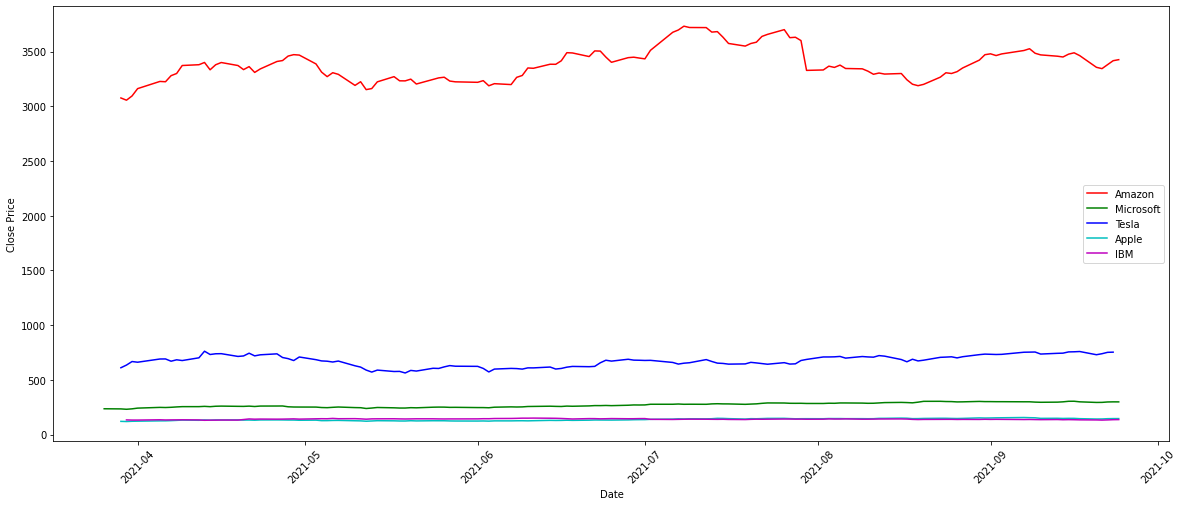

In [ ]:
#ploting the date Vs close values for all the 5 stocks.
import matplotlib.pyplot as plt
%matplotlib inline
stock_data_slice1=stock_data_combined.iloc[0:126,:]
stock_data_slice2=stock_data_combined.iloc[127:254,:]
stock_data_slice3=stock_data_combined.iloc[255:380,:]
stock_data_slice4=stock_data_combined.iloc[381:507,:]
stock_data_slice5=stock_data_combined.iloc[508:633,:]
#stock_data_date_sorted = stock_data_slice.sort_values('Date')
plt.figure(figsize=(20,8))
plt.plot('Date','Close',data=stock_data_slice1,color='r', label='Amazon')
plt.plot('Date','Close',data=stock_data_slice2,color='g', label='Microsoft')
plt.plot('Date','Close',data=stock_data_slice3,color='b', label='Tesla')
plt.plot('Date','Close',data=stock_data_slice4,color='c', label='Apple')
plt.plot('Date','Close',data=stock_data_slice5,color='m', label='IBM')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.xticks(rotation=45)
stock_data_slice5

Creating EDA plots for individual companies,Amazon is taken as an example.

CALCULATING DAILY RETURNS-
Generally returns are negative.Kurtosis tells the ‘fatness’ of the tail and it is important because it tells you how ‘extreme’ can the values get.Here the value is positive, so this indicates that the chance of ‘extreme’ values are rare.

## EDA for **AMAZON**

mean = 0.001015265312635101
Std deviation = 0.014023268957455128
minimum daily reurns = -0.07564890330896235
maximum daily reurns = 0.04692706879560693
kurtosis= 6.7766017134944585


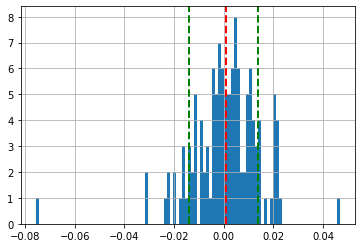

In [ ]:
#CALCULATING DAILY RETURNS
#create some useful columns for us to make some interesting inferences about the stock
#generally returns are negative
stock_data=stock_data_amazon
stock_data['Daily Lag'] = stock_data['Close'].shift(1)
stock_data['Daily Returns'] = (stock_data['Daily Lag']/ stock_data['Close'])-1
mean = stock_data['Daily Returns'].mean()
std = stock_data['Daily Returns'].std()
minimum_returns=stock_data['Daily Returns'].min()
maximum_returns=stock_data['Daily Returns'].max()
print('mean =',mean)
print('Std deviation =',std)
print('minimum daily reurns =',minimum_returns)
print('maximum daily reurns =',maximum_returns)
stock_data['Daily Returns'].hist(bins=100)
plt.axvline(mean,color='red',linestyle='dashed',linewidth=2)
#to plot the std line we plot both the positive and negative values 
plt.axvline(std,color='g',linestyle='dashed',linewidth=2)
plt.axvline(-std,color='g',linestyle='dashed',linewidth=2)
#Kurtosis tells the ‘fatness’ of the tail and it is important because it tells you how ‘extreme’ can the values get.
print('kurtosis=',stock_data['Daily Returns'].kurtosis())
#the value is positive, so this indicates that the chance of ‘extreme’ values are rare.


Date vs High and Low stock price plot for Amazon shows flexible prices over the period.And the highest stock price was in the month of july.

(array([737881., 737911., 737942., 737972., 738003., 738034., 738064.]),
 <a list of 7 Text major ticklabel objects>)

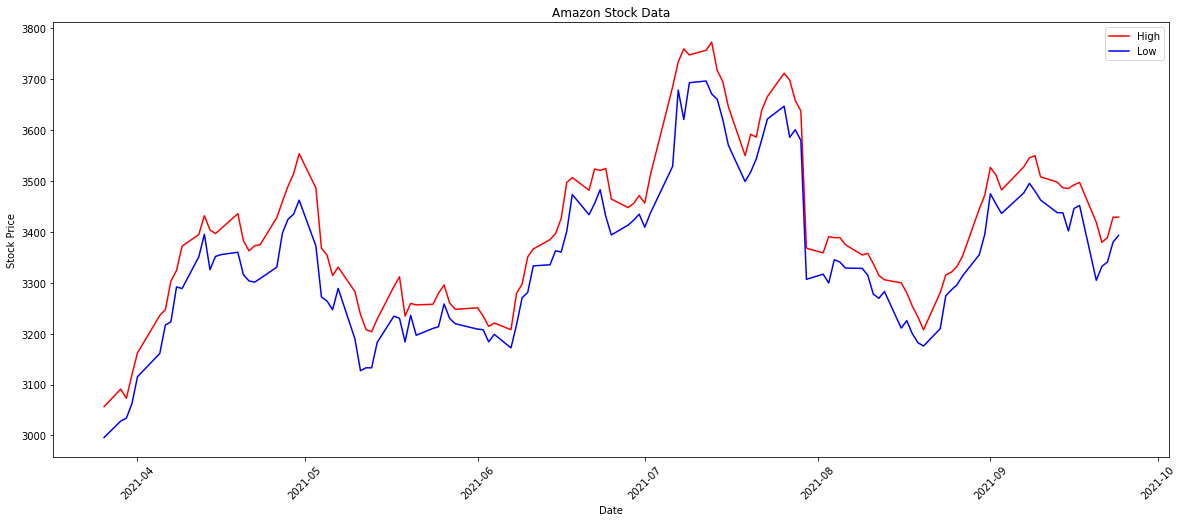

In [ ]:
# Date vs High and Low price plot for Amazon
import matplotlib.pyplot as plt
#%matplotlib inline
plt.figure(figsize=(20,8))
plt.plot('Date','High',data=stock_data,color='r', label='High')
plt.plot('Date','Low',data=stock_data,color='b', label='Low')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Amazon Stock Data')
plt.legend()
plt.xticks(rotation=45)

Volume is the total amount of trading activity.it can show the significance of a stock’s price movement.High volume can carry more weight because it indicates that many traders were behind the move.
Here for amazon the end of july shows the highest trading activity.

(array([737881., 737911., 737942., 737972., 738003., 738034., 738064.]),
 <a list of 7 Text major ticklabel objects>)

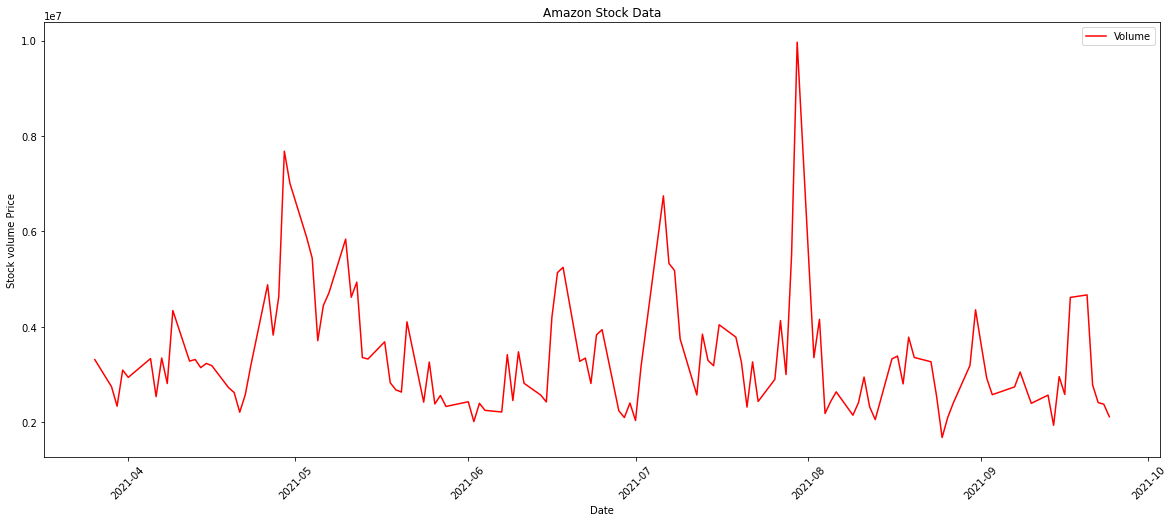

In [ ]:
# Trade volume plot for Amazon
import matplotlib.pyplot as plt
#%matplotlib inline
plt.figure(figsize=(20,8))
plt.plot('Date','Volume',data=stock_data,color='r', label='Volume')
plt.xlabel('Date')
plt.ylabel('Stock volume Price')
plt.title('Amazon Stock Data')
plt.legend()
plt.xticks(rotation=45)

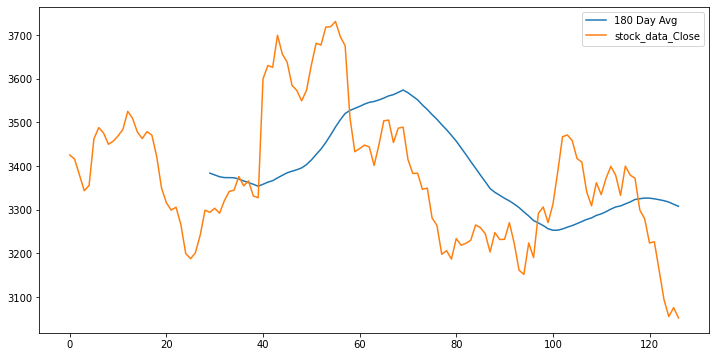

In [ ]:
#Plot the rolling 180 day average against the Close Price for stock_data
plt.figure(figsize=(12,6))
stock_data['Close'].rolling(window=30).mean().plot(label='180 Day Avg')
stock_data['Close'].plot(label='stock_data_Close')
plt.legend()

Amazon shows an almost synchronous open and close value over the period.

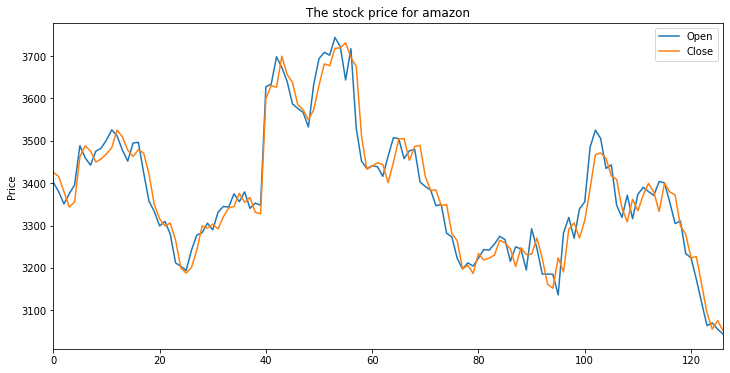

In [ ]:
#plotting the open and close value of amazon
title = 'The stock price for amazon'
ylabel='Price'
ax = stock_data[['Open','Close']].plot(figsize=(12,6),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(ylabel=ylabel);

Summarizing Time-series Data with Histograms.
The month of july shows the highest closing average over 6 months.

In [ ]:
#pass in daily data and display it as monthly averages by setting histfunc="avg and xbins_size="M1".
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
fig = px.histogram(stock_data, x="Date", y="Close", histfunc="avg", title="Histogram on Date Axes")
fig.update_traces(xbins_size="M1")
fig.update_xaxes(showgrid=True,dtick="M1", tickformat="%b\n%Y")
fig.update_layout(bargap=0.1)
fig.add_trace(go.Scatter(mode="markers", x=stock_data["Date"], y=stock_data["Close"], name="daily"))
fig.show()

OHLC plots.An OHLC chart is a type of bar chart that shows open, high, low, and closing prices for each period.The chart type is useful because it can show increasing or decreasing momentum.
When the open and close are far apart it shows strong momentum.The high and low show the full price range of the period, useful in assessing volatility.The entire structure is called a price bar.
The height of the vertical line represents the intraday range for the period, with the high being the period's high and the low of the vertical line being the period's low.When the price rises over a period, the right line will be above the left, since the close is above the open.
HERE THE MONTH OF JULY SHOWS MOST OF THE CLOSING PRICES ABOVE THE OPENING PRICES INDICATES A GOOD TREND.  



In [ ]:
#OHLC plot with custom colurs,increasing_line_color= 'cyan', decreasing_line_color= 'gray'

import plotly.graph_objects as go
fig = go.Figure(data=[go.Ohlc(
    x=stock_data['Date'],
    open=stock_data['Open'], high=stock_data['High'],
    low=stock_data['Low'], close=stock_data['Close'])])
    
fig.show()

CANDLESTICK PLOTS
Candlesticks reflect the impact of investor sentiment on security prices and are used by technical analysts to determine when to enter and exit trades.The candlestick's shadows show the day's high and low and how they compare to the open and close.Long  candlesticks indicate there is strong buying pressure; this typically indicates price is bullish.
Here for amazon,the highest candle stick value is for the month of july over the 6 month period.

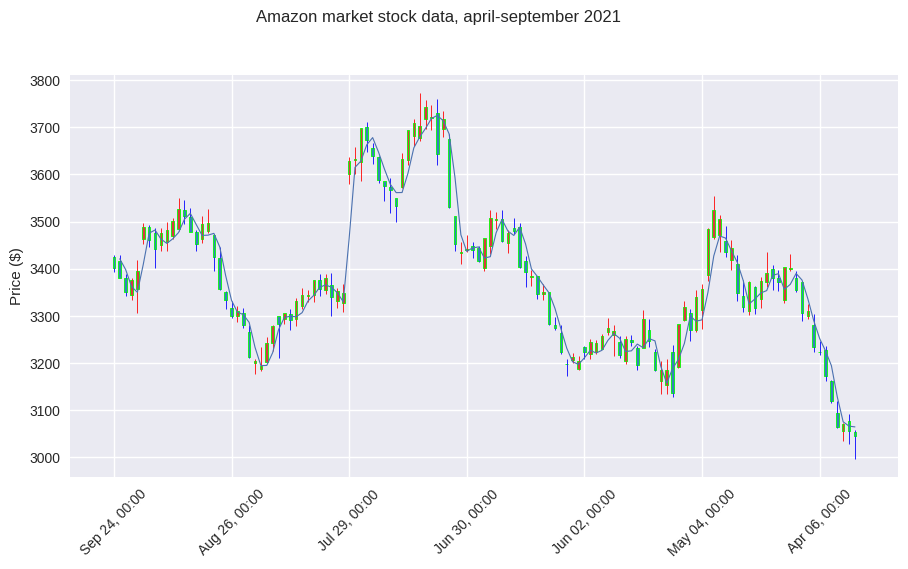

In [ ]:
#mplfinance candlestickplot to analyse stock data,see the volume plot below the candlestick chart,gaps showing for non-trading days as well
#added moving averages of price by passing value,pass information about the size and quality of an image to be saved.
!pip install --upgrade mplfinance
import mplfinance as fplt
stock_data.index = pd.DatetimeIndex(stock_data['Date'])

#taking one month data for candlestickplot
#stock_data_1month=stock_data.loc['04/06/2021':'08/30/2021',:]
mc = fplt.make_marketcolors(
                            up='tab:blue',down='tab:red',
                            edge='lime',
                            wick={'up':'blue','down':'red'},
                            volume='lawngreen',
                           )

s  = fplt.make_mpf_style(base_mpl_style="seaborn", marketcolors=mc)

fplt.plot(
        stock_data,
        type="candle",
        title='Amazon market stock data, april-september 2021',
        ylabel='Price ($)',
        mav=(2),
        figratio=(12,6),
        style=s
        #savefig=dict(fname='apple_march_2020.png',dpi=100,pad_inches=0.25),
        
    )



In [ ]:

#CandleStick with Slider to Analyze Range 
candlestick = go.Candlestick(
                                x=stock_data.index,
                                open=stock_data['Open'],
                                high=stock_data['High'],
                                low=stock_data['Low'],
                                close=stock_data['Close'],
                                increasing_line_color= 'blue', decreasing_line_color= 'orange',

                            )

fig = go.Figure(data=[candlestick])

fig.update_layout(
    title="stock data,April -september 2021",
    yaxis_title='price($)',
)

fig.show()

Box plot-A Box Plot is a convenient way of graphically depicting groups of numerical data through their quartiles. They provide a graphical rendition of statistical data based on the minimum, first quartile, median, third quartile, and maximum, also Outliers can be plotted as individual points.The points outside the ends of the whiskers are outliers or suspected outliers.

BOX plot-
Here box plot is used to find which weekday is better for day trading based on the price amplitude, and which is more likely to witness the highest gap at the opening of the market.The highest gap is more likely to occur on Friday, while the lowest is more likely to occur on Thirsay.
Selling stocks on Friday’s opening time might be more profitable.

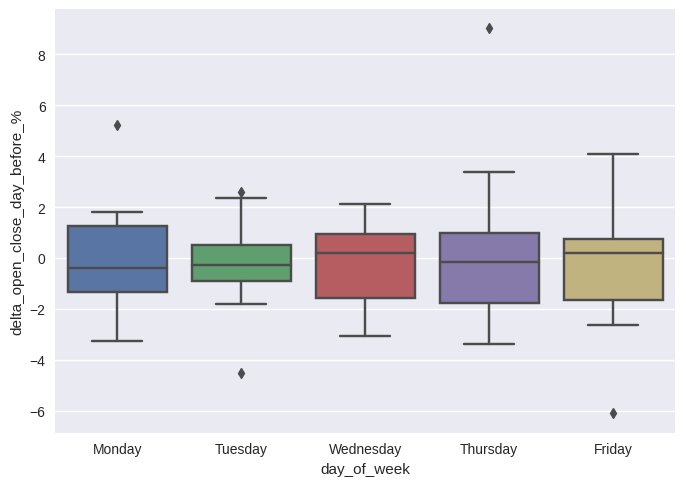

In [ ]:
#explore the dataset by adding new variables
#first variable measures the gap between the Close price and the day-after Open price :
stock_data['delta_open_close_day_before_%']=((stock_data['Open']-stock_data['Close'].shift(1))/stock_data['Close'].shift(1))*100
#plot this new variable grouped by the weekday
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data['day_of_week'] = stock_data['Date'].dt.day_name()
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
sns.boxplot(x=stock_data.day_of_week, y=stock_data['delta_open_close_day_before_%'], order=order);
#The highest gap is more likely to occur on friday, while the lowest is more likely to occur on Thirsday.
# Selling stocks on Friday’s opening time might be more profitable.

A second variable, which measures in % the amplitude in the daily stock price between the High price variable and the Low price variable.It especially allows figure out which weekday is better for day trading based on the price amplitude, and which is more likely to witness the highest gap at the opening of the market.
The highest amplitude is more likely to occur during Tuesday, which could be interesting to know for a day trading.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



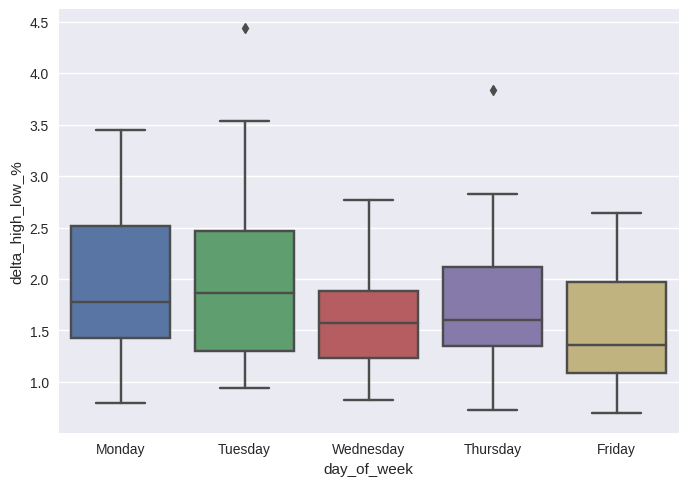

In [ ]:
#a second variable, which measures in % the amplitude in the daily stock price between the High price variable and the Low price variable :
stock_data['delta_high_low_%']=((stock_data['High']-stock_data['Low'])/stock_data['Low'])*100
stock_data['day_of_week'] = stock_data['Date'].dt.day_name()
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
sns.boxplot(stock_data.day_of_week, y=stock_data['delta_high_low_%'], order=order);
#The highest amplitude is more likely to occur during Tuesday, which could be interesting to know for a day trading.

#EDA for Microsoft

CALCULATING DAILY RETURNS- Generally returns are negative.Kurtosis tells the ‘fatness’ of the tail and it is important because it tells you how ‘extreme’ can the values get.Here the value is positive, so this indicates that the chance of ‘extreme’ values are rare.



mean = 0.0019305976478186616
Std deviation = 0.010805588227247432
minimum daily reurns = -0.029362790886569456
maximum daily reurns = 0.027908554947618347
kurtosis= 0.253006909204478


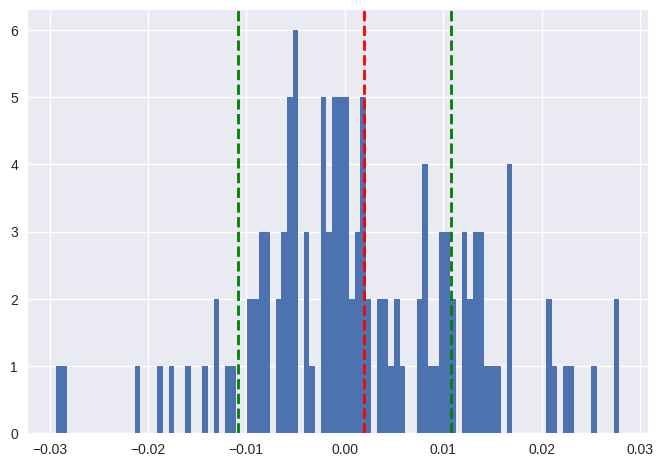

In [ ]:
#CALCULATING DAILY RETURNS
#create some useful columns for us to make some interesting inferences about the stock
#generally returns are negative
stock_data=stock_data_msft
stock_data['Daily Lag'] = stock_data['Close'].shift(1)
stock_data['Daily Returns'] = (stock_data['Daily Lag']/ stock_data['Close'])-1
mean = stock_data['Daily Returns'].mean()
std = stock_data['Daily Returns'].std()
minimum_returns=stock_data['Daily Returns'].min()
maximum_returns=stock_data['Daily Returns'].max()
print('mean =',mean)
print('Std deviation =',std)
print('minimum daily reurns =',minimum_returns)
print('maximum daily reurns =',maximum_returns)
stock_data['Daily Returns'].hist(bins=100)
plt.axvline(mean,color='red',linestyle='dashed',linewidth=2)
#to plot the std line we plot both the positive and negative values 
plt.axvline(std,color='g',linestyle='dashed',linewidth=2)
plt.axvline(-std,color='g',linestyle='dashed',linewidth=2)
#Kurtosis tells the ‘fatness’ of the tail and it is important because it tells you how ‘extreme’ can the values get.
print('kurtosis=',stock_data['Daily Returns'].kurtosis())
#the value is positive, so this indicates that the chance of ‘extreme’ values are rare.


Date vs High and Low stock price plot for microsoft shows flexible prices over the period.And the highest stock price was in the month of july.

(array([737881., 737911., 737942., 737972., 738003., 738034., 738064.]),
 <a list of 7 Text major ticklabel objects>)

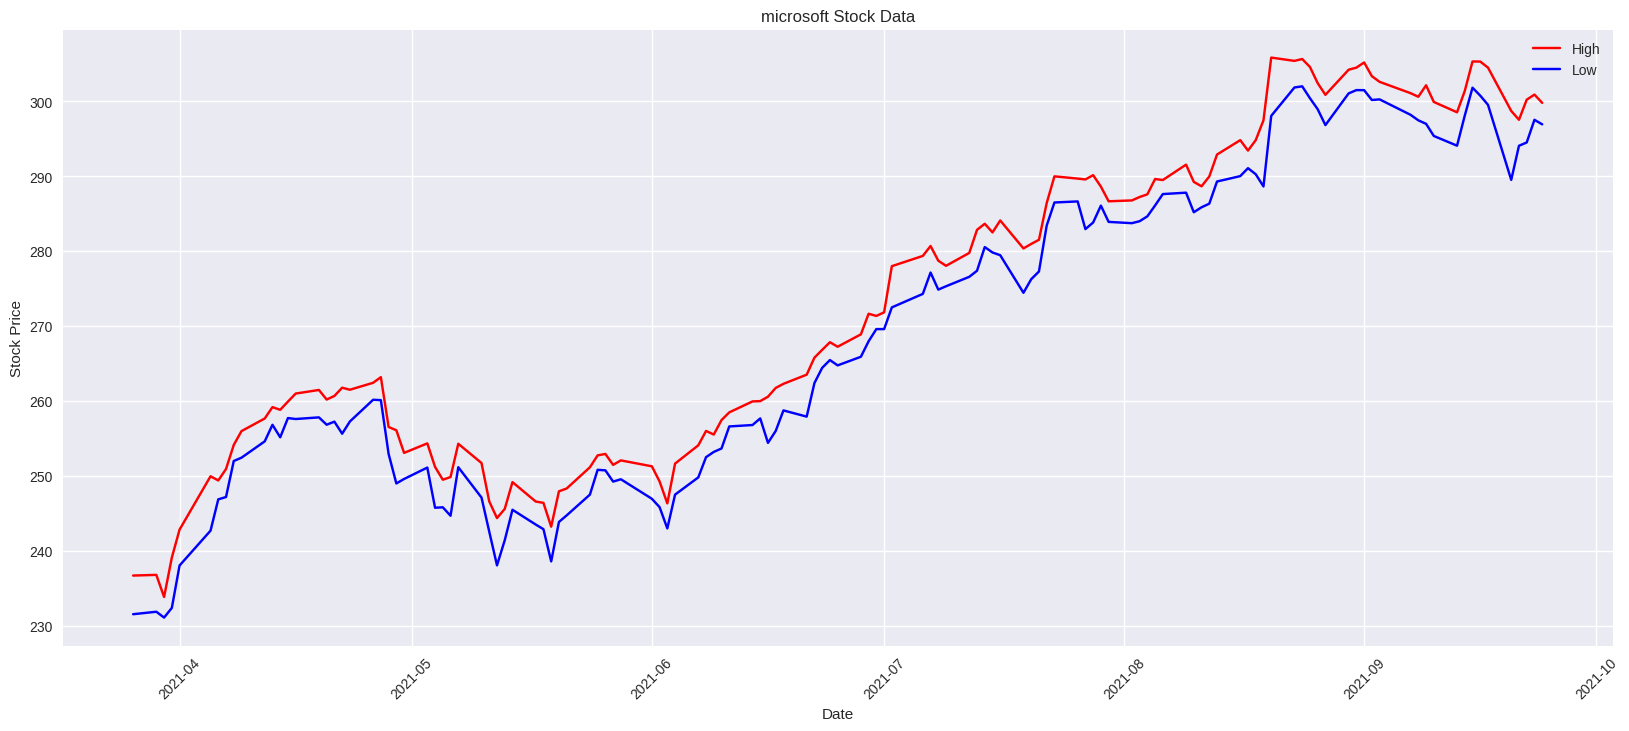

In [ ]:
# Date vs High and Low price plot for Amazon
import matplotlib.pyplot as plt
#%matplotlib inline
plt.figure(figsize=(20,8))
plt.plot('Date','High',data=stock_data,color='r', label='High')
plt.plot('Date','Low',data=stock_data,color='b', label='Low')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('microsoft Stock Data')
plt.legend()
plt.xticks(rotation=45)

Volume is the total amount of trading activity.it can show the significance of a stock’s price movement.High volume can carry more weight because it indicates that many traders were behind the move. Here for microsoft the end of april shows the highest trading activity.

(array([737881., 737911., 737942., 737972., 738003., 738034., 738064.]),
 <a list of 7 Text major ticklabel objects>)

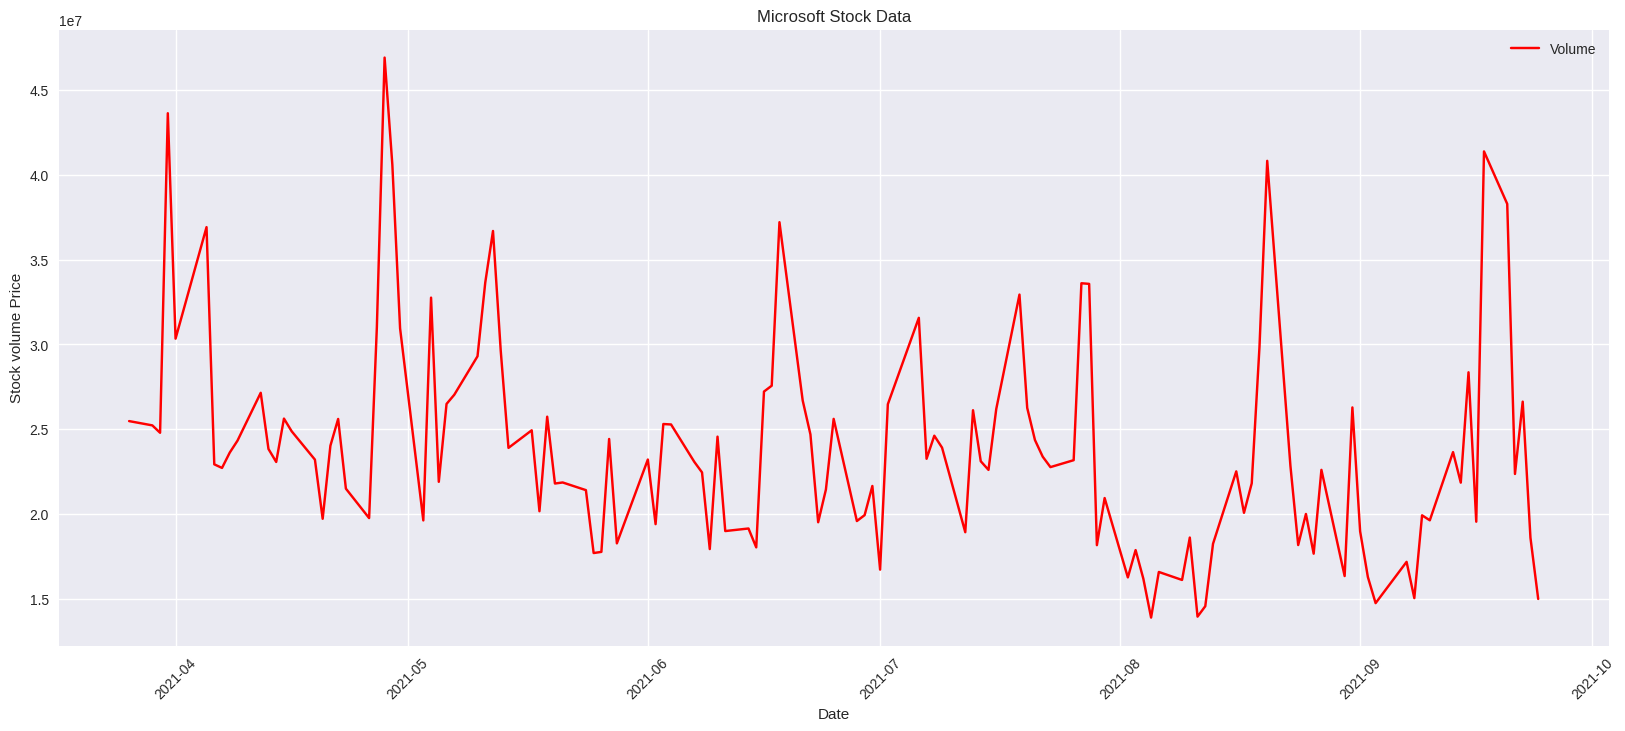

In [ ]:
# Trade volume plot for Microsoft
import matplotlib.pyplot as plt
#%matplotlib inline
plt.figure(figsize=(20,8))
plt.plot('Date','Volume',data=stock_data,color='r', label='Volume')
plt.xlabel('Date')
plt.ylabel('Stock volume Price')
plt.title('Microsoft Stock Data')
plt.legend()
plt.xticks(rotation=45)

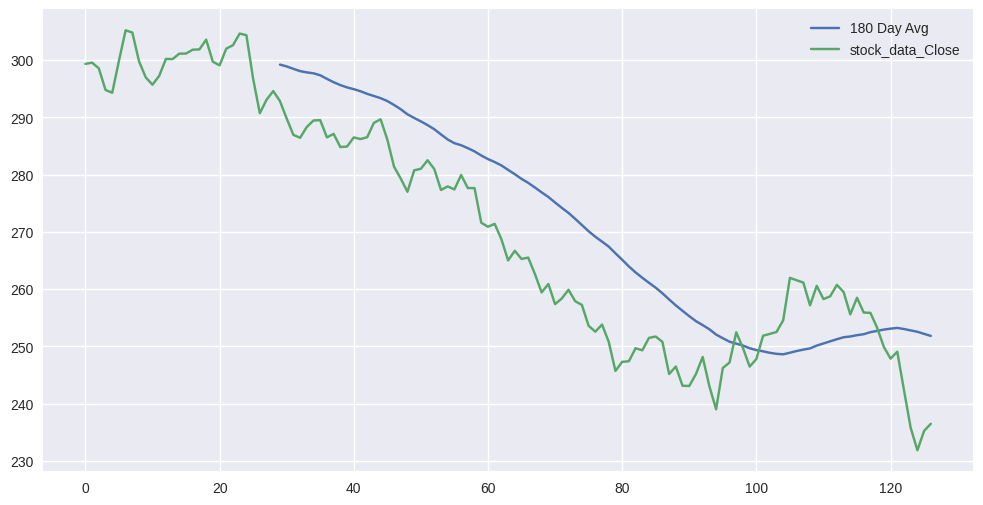

In [ ]:
#Plot the rolling 180 day average against the Close Price for stock_data
plt.figure(figsize=(12,6))
stock_data['Close'].rolling(window=30).mean().plot(label='180 Day Avg')
stock_data['Close'].plot(label='stock_data_Close')
plt.legend()

Microsoft shows an almost synchronous open and close value over the period

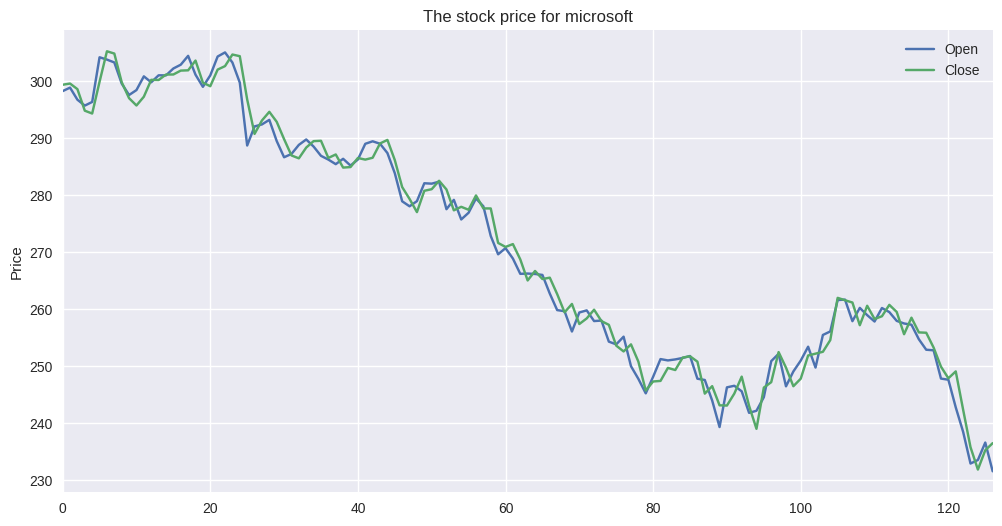

In [ ]:
#plotting the open and close value of microsoft
title = 'The stock price for microsoft'
ylabel='Price'
ax = stock_data[['Open','Close']].plot(figsize=(12,6),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(ylabel=ylabel);

Summarizing Time-series Data with Histograms. The month of september shows the highest closing average over 6 months.

In [ ]:
#pass in daily data and display it as monthly averages by setting histfunc="avg and xbins_size="M1".
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
fig = px.histogram(stock_data, x="Date", y="Close", histfunc="avg", title="Histogram on Date Axes")
fig.update_traces(xbins_size="M1")
fig.update_xaxes(showgrid=True,dtick="M1", tickformat="%b\n%Y")
fig.update_layout(bargap=0.1)
fig.add_trace(go.Scatter(mode="markers", x=stock_data["Date"], y=stock_data["Close"], name="daily"))
fig.show()

OHLC plots.An OHLC chart is a type of bar chart that shows open, high, low, and closing prices for each period.The chart type is useful because it can show increasing or decreasing momentum. When the open and close are far apart it shows strong momentum.The high and low show the full price range of the period, useful in assessing volatility.The entire structure is called a price bar. The height of the vertical line represents the intraday range for the period, with the high being the period's high and the low of the vertical line being the period's low.When the price rises over a period, the right line will be above the left, since the close is above the open. HERE THE MONTH OF April SHOWS MOST OF THE CLOSING PRICES ABOVE THE OPENING PRICES INDICATES A GOOD TREND.

In [ ]:
#OHLC plot with custom colurs,increasing_line_color= 'cyan', decreasing_line_color= 'gray'

import plotly.graph_objects as go
fig = go.Figure(data=[go.Ohlc(
    x=stock_data['Date'],
    open=stock_data['Open'], high=stock_data['High'],
    low=stock_data['Low'], close=stock_data['Close'])])
    
fig.show()

CANDLESTICK PLOTS Candlesticks reflect the impact of investor sentiment on security prices and are used by technical analysts to determine when to enter and exit trades.The candlestick's shadows show the day's high and low and how they compare to the open and close.Long candlesticks indicate there is strong buying pressure; this typically indicates price is bullish. Here for microsoft,the highest candle stick value is for the month of Auguest over the 6 month period.

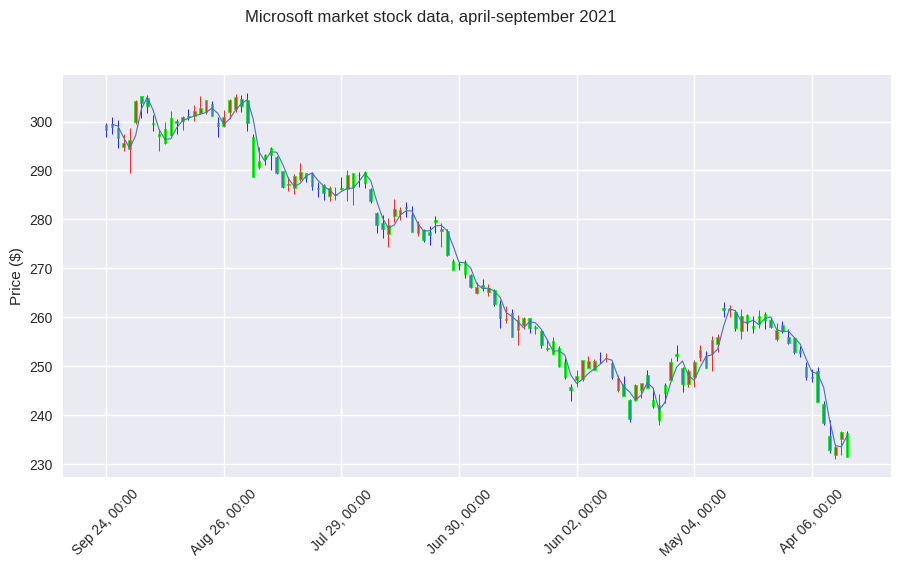

In [ ]:
#mplfinance candlestickplot to analyse stock data,see the volume plot below the candlestick chart,gaps showing for non-trading days as well
#added moving averages of price by passing value,pass information about the size and quality of an image to be saved.
!pip install --upgrade mplfinance
import mplfinance as fplt
stock_data.index = pd.DatetimeIndex(stock_data['Date'])

#taking one month data for candlestickplot
#stock_data_1month=stock_data.loc['04/06/2021':'08/30/2021',:]
mc = fplt.make_marketcolors(
                            up='tab:blue',down='tab:red',
                            edge='lime',
                            wick={'up':'blue','down':'red'},
                            volume='lawngreen',
                           )

s  = fplt.make_mpf_style(base_mpl_style="seaborn", marketcolors=mc)

fplt.plot(
        stock_data,
        type="candle",
        title='Microsoft market stock data, april-september 2021',
        ylabel='Price ($)',
        mav=(2),
        figratio=(12,6),
        style=s
        
        
    )



In [ ]:

#CandleStick with Slider to Analyze Range 
candlestick = go.Candlestick(
                                x=stock_data.index,
                                open=stock_data['Open'],
                                high=stock_data['High'],
                                low=stock_data['Low'],
                                close=stock_data['Close'],
                                increasing_line_color= 'blue', decreasing_line_color= 'orange',

                            )

fig = go.Figure(data=[candlestick])

fig.update_layout(
    title="stock data,April -september 2021",
    yaxis_title='price($)',
)

fig.show()

Box plot-A Box Plot is a convenient way of graphically depicting groups of numerical data through their quartiles. They provide a graphical rendition of statistical data based on the minimum, first quartile, median, third quartile, and maximum, also Outliers can be plotted as individual points.The points outside the ends of the whiskers are outliers or suspected outliers.

BOX plot- Here box plot is used to find which weekday is better for day trading based on the price amplitude, and which is more likely to witness the highest gap at the opening of the market.The highest gap is more likely to occur on Tuesday, while the lowest is more likely to occur on Thirsay. Selling stocks on tuesday’s opening time might be more profitable.

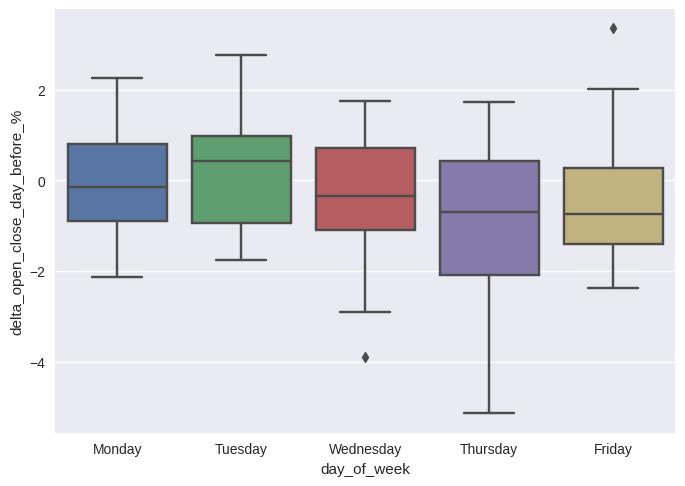

In [ ]:
#explore the dataset by adding new variables
#first variable measures the gap between the Close price and the day-after Open price :
stock_data['delta_open_close_day_before_%']=((stock_data['Open']-stock_data['Close'].shift(1))/stock_data['Close'].shift(1))*100
#plot this new variable grouped by the weekday
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data['day_of_week'] = stock_data['Date'].dt.day_name()
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
sns.boxplot(x=stock_data.day_of_week, y=stock_data['delta_open_close_day_before_%'], order=order);


A second variable, which measures in % the amplitude in the daily stock price between the High price variable and the Low price variable.It especially allows figure out which weekday is better for day trading based on the price amplitude, and which is more likely to witness the highest gap at the opening of the market. The highest amplitude is more likely to occur during Thirsday, which could be interesting to know for a day trading.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



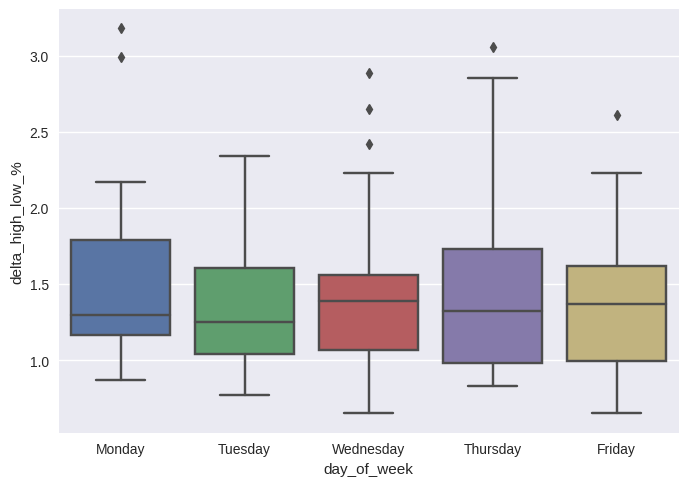

In [ ]:
#a second variable, which measures in % the amplitude in the daily stock price between the High price variable and the Low price variable :
stock_data['delta_high_low_%']=((stock_data['High']-stock_data['Low'])/stock_data['Low'])*100
stock_data['day_of_week'] = stock_data['Date'].dt.day_name()
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
sns.boxplot(stock_data.day_of_week, y=stock_data['delta_high_low_%'], order=order);


### EDA For **Tesla**

CALCULATING DAILY RETURNS- Generally returns are negative.Kurtosis tells the ‘fatness’ of the tail and it is important because it tells you how ‘extreme’ can the values get.Here the value is positive, so this indicates that the chance of ‘extreme’ values are rare.

mean = 0.0020928453530268364
Std deviation = 0.025054688022584523
minimum daily reurns = -0.06444368428097635
maximum daily reurns = 0.08595686486794496
kurtosis= 0.4053488630498432


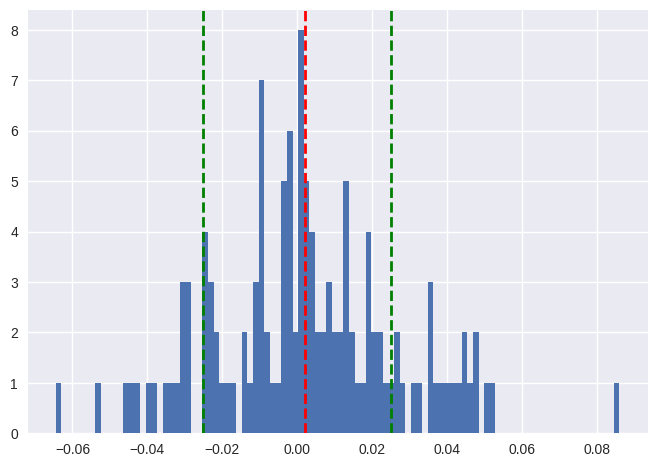

In [ ]:
#CALCULATING DAILY RETURNS
#create some useful columns for us to make some interesting inferences about the stock
#generally returns are negative
stock_data=stock_data_tesla
stock_data['Daily Lag'] = stock_data['Close'].shift(1)
stock_data['Daily Returns'] = (stock_data['Daily Lag']/ stock_data['Close'])-1
mean = stock_data['Daily Returns'].mean()
std = stock_data['Daily Returns'].std()
minimum_returns=stock_data['Daily Returns'].min()
maximum_returns=stock_data['Daily Returns'].max()
print('mean =',mean)
print('Std deviation =',std)
print('minimum daily reurns =',minimum_returns)
print('maximum daily reurns =',maximum_returns)
stock_data['Daily Returns'].hist(bins=100)
plt.axvline(mean,color='red',linestyle='dashed',linewidth=2)
#to plot the std line we plot both the positive and negative values 
plt.axvline(std,color='g',linestyle='dashed',linewidth=2)
plt.axvline(-std,color='g',linestyle='dashed',linewidth=2)
#Kurtosis tells the ‘fatness’ of the tail and it is important because it tells you how ‘extreme’ can the values get.
print('kurtosis=',stock_data['Daily Returns'].kurtosis())
#the value is positive, so this indicates that the chance of ‘extreme’ values are rare.


Date vs High and Low stock price plot for Tesla shows flexible prices over the period.And the highest stock price was in the month of april

(array([737881., 737911., 737942., 737972., 738003., 738034., 738064.]),
 <a list of 7 Text major ticklabel objects>)

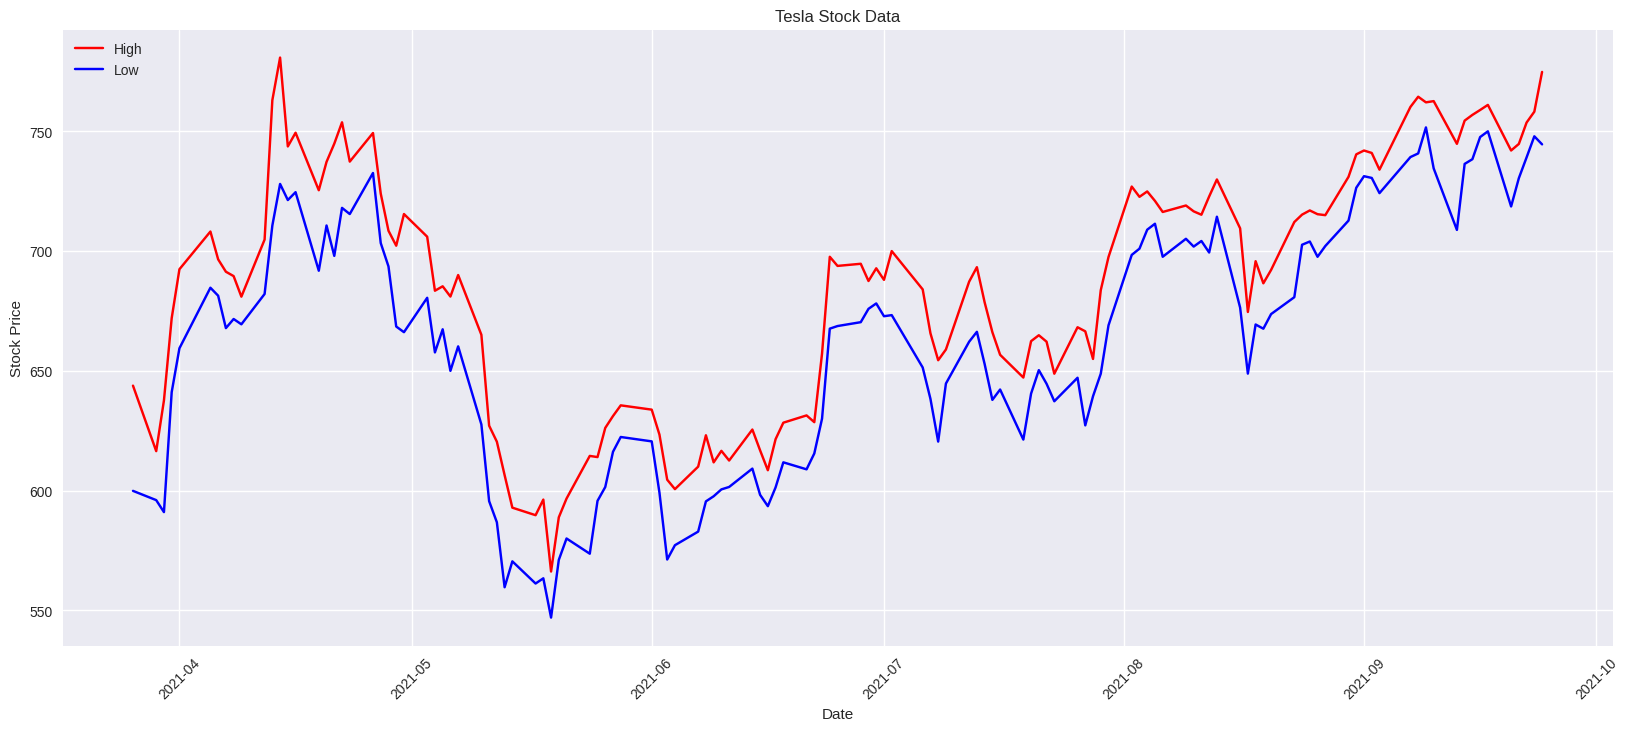

In [ ]:
# Date vs High and Low price plot for Tesla
import matplotlib.pyplot as plt
#%matplotlib inline
plt.figure(figsize=(20,8))
plt.plot('Date','High',data=stock_data,color='r', label='High')
plt.plot('Date','Low',data=stock_data,color='b', label='Low')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Tesla Stock Data')
plt.legend()
plt.xticks(rotation=45)

Volume is the total amount of trading activity.it can show the significance of a stock’s price movement.High volume can carry more weight because it indicates that many traders were behind the move. Here for tesla the end of aprilshows the highest trading activity.

(array([737881., 737911., 737942., 737972., 738003., 738034., 738064.]),
 <a list of 7 Text major ticklabel objects>)

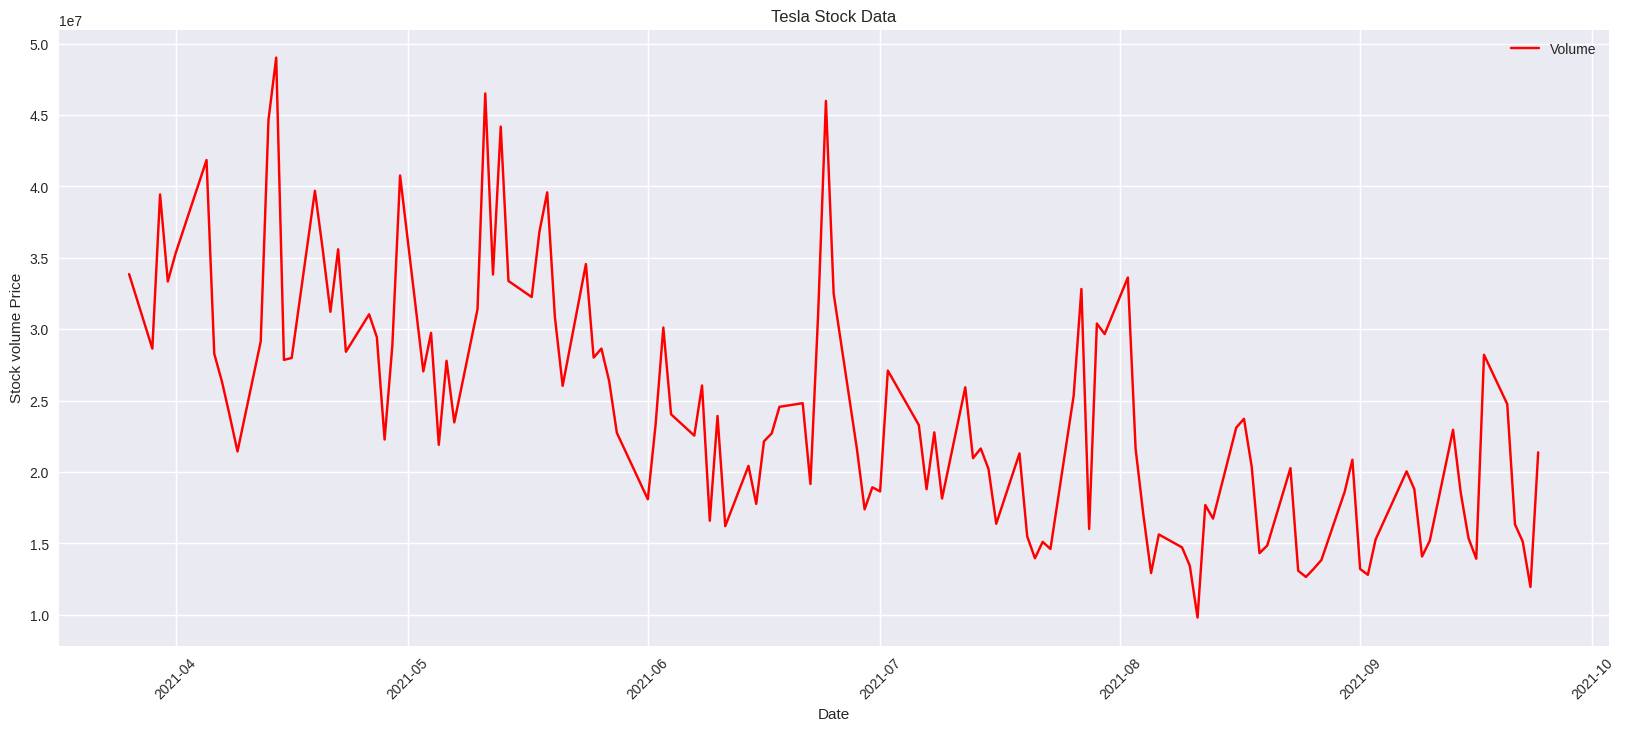

In [ ]:
# Trade volume plot for Tesla
import matplotlib.pyplot as plt
#%matplotlib inline
plt.figure(figsize=(20,8))
plt.plot('Date','Volume',data=stock_data,color='r', label='Volume')
plt.xlabel('Date')
plt.ylabel('Stock volume Price')
plt.title('Tesla Stock Data')
plt.legend()
plt.xticks(rotation=45)

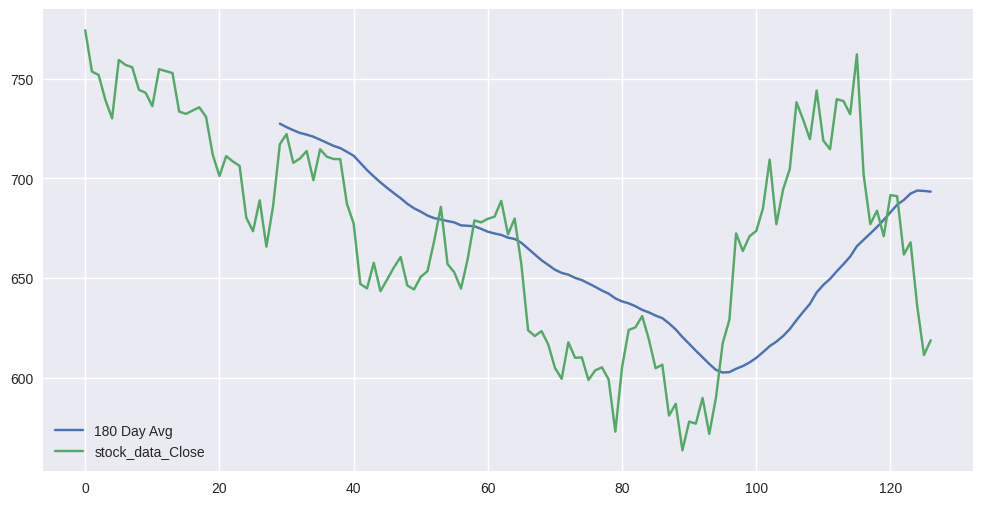

In [ ]:
#Plot the rolling 180 day average against the Close Price for stock_data
plt.figure(figsize=(12,6))
stock_data['Close'].rolling(window=30).mean().plot(label='180 Day Avg')
stock_data['Close'].plot(label='stock_data_Close')
plt.legend()

tesla shows an almost synchronous open and close value over the period.

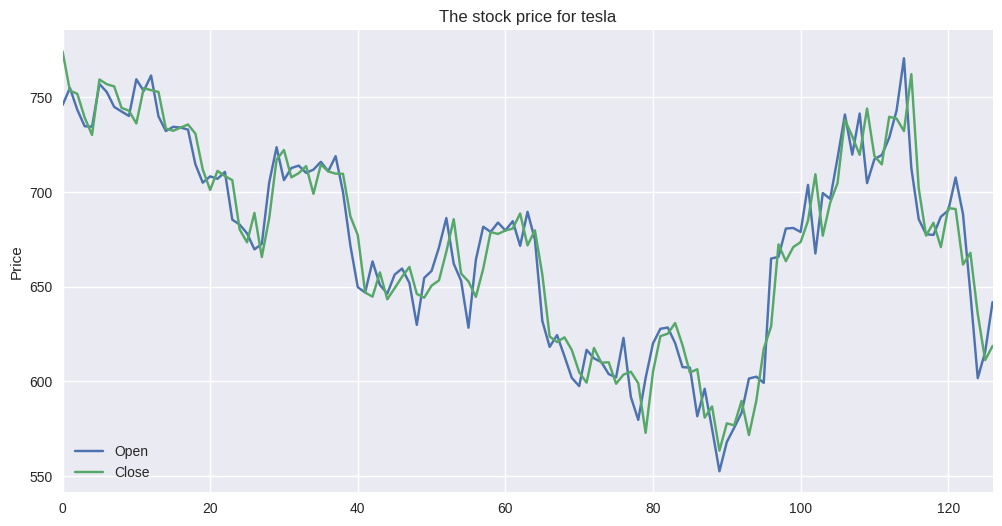

In [ ]:
#plotting the open and close value of Tesla
title = 'The stock price for tesla'
ylabel='Price'
ax = stock_data[['Open','Close']].plot(figsize=(12,6),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(ylabel=ylabel);

Summarizing Time-series Data with Histograms. The month of april shows the highest closing average over 6 months.

In [ ]:
#pass in daily data and display it as monthly averages by setting histfunc="avg and xbins_size="M1".
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
fig = px.histogram(stock_data, x="Date", y="Close", histfunc="avg", title="Histogram on Date Axes")
fig.update_traces(xbins_size="M1")
fig.update_xaxes(showgrid=True,dtick="M1", tickformat="%b\n%Y")
fig.update_layout(bargap=0.1)
fig.add_trace(go.Scatter(mode="markers", x=stock_data["Date"], y=stock_data["Close"], name="daily"))
fig.show()

OHLC plots.An OHLC chart is a type of bar chart that shows open, high, low, and closing prices for each period.The chart type is useful because it can show increasing or decreasing momentum. When the open and close are far apart it shows strong momentum.The high and low show the full price range of the period, useful in assessing volatility.The entire structure is called a price bar. The height of the vertical line represents the intraday range for the period, with the high being the period's high and the low of the vertical line being the period's low.When the price rises over a period, the right line will be above the left, since the close is above the open. HERE THE MONTH OF April SHOWS MOST OF THE CLOSING PRICES ABOVE THE OPENING PRICES INDICATES A GOOD TREND.

In [ ]:
#OHLC plot with custom colurs,increasing_line_color= 'cyan', decreasing_line_color= 'gray'

import plotly.graph_objects as go
fig = go.Figure(data=[go.Ohlc(
    x=stock_data['Date'],
    open=stock_data['Open'], high=stock_data['High'],
    low=stock_data['Low'], close=stock_data['Close'])])
    
fig.show()

CANDLESTICK PLOTS Candlesticks reflect the impact of investor sentiment on security prices and are used by technical analysts to determine when to enter and exit trades.The candlestick's shadows show the day's high and low and how they compare to the open and close.Long candlesticks indicate there is strong buying pressure; this typically indicates price is bullish. Here for Tesla,the highest candle stick value is for the month of May over the 6 month period.

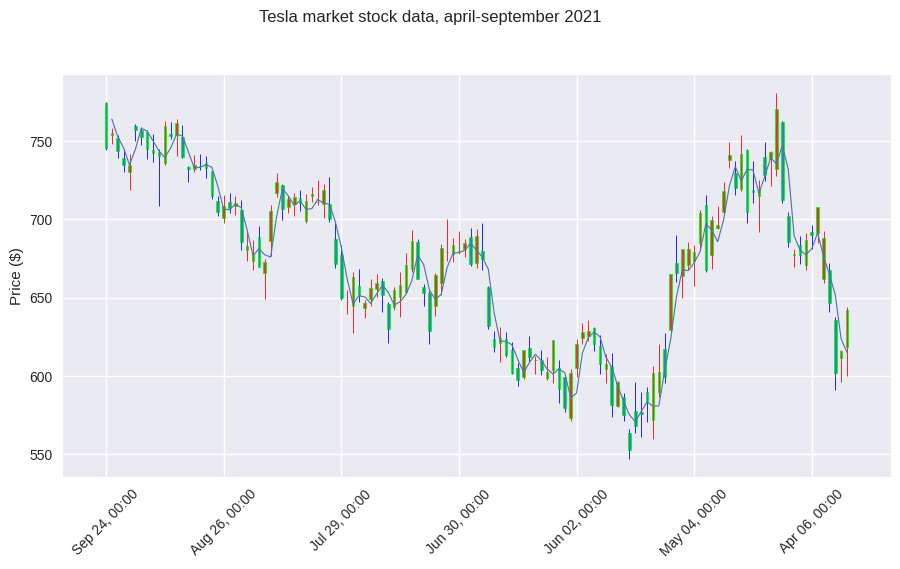

In [ ]:
#mplfinance candlestickplot to analyse stock data,see the volume plot below the candlestick chart,gaps showing for non-trading days as well
#added moving averages of price by passing value,pass information about the size and quality of an image to be saved.
!pip install --upgrade mplfinance
import mplfinance as fplt
stock_data.index = pd.DatetimeIndex(stock_data['Date'])

#taking one month data for candlestickplot
#stock_data_1month=stock_data.loc['04/06/2021':'08/30/2021',:]
mc = fplt.make_marketcolors(
                            up='tab:blue',down='tab:red',
                            edge='lime',
                            wick={'up':'blue','down':'red'},
                            volume='lawngreen',
                           )

s  = fplt.make_mpf_style(base_mpl_style="seaborn", marketcolors=mc)

fplt.plot(
        stock_data,
        type="candle",
        title='Tesla market stock data, april-september 2021',
        ylabel='Price ($)',
        mav=(2),
        figratio=(12,6),
        style=s
        #savefig=dict(fname='apple_march_2020.png',dpi=100,pad_inches=0.25),
        
    )



In [ ]:

#CandleStick with Slider to Analyze Range 
candlestick = go.Candlestick(
                                x=stock_data.index,
                                open=stock_data['Open'],
                                high=stock_data['High'],
                                low=stock_data['Low'],
                                close=stock_data['Close'],
                                increasing_line_color= 'blue', decreasing_line_color= 'orange',

                            )

fig = go.Figure(data=[candlestick])

fig.update_layout(
    title="stock data,April -september 2021",
    yaxis_title='price($)',
)

fig.show()

Box plot-A Box Plot is a convenient way of graphically depicting groups of numerical data through their quartiles. They provide a graphical rendition of statistical data based on the minimum, first quartile, median, third quartile, and maximum, also Outliers can be plotted as individual points.The points outside the ends of the whiskers are outliers or suspected outliers.

BOX plot- Here box plot is used to find which weekday is better for day trading based on the price amplitude, and which is more likely to witness the highest gap at the opening of the market.The highest gap is more likely to occur on Monday, while the lowest is more likely to occur on wednesday. Selling stocks on Monday’s opening time might be more profitable.

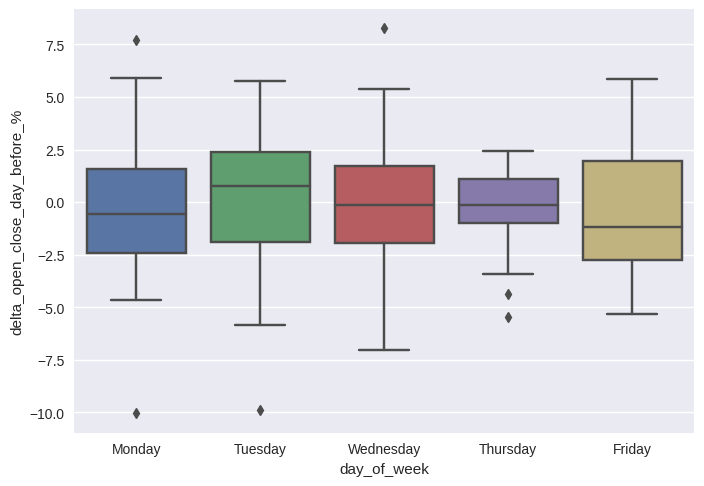

In [ ]:
#explore the dataset by adding new variables
#first variable measures the gap between the Close price and the day-after Open price :
stock_data['delta_open_close_day_before_%']=((stock_data['Open']-stock_data['Close'].shift(1))/stock_data['Close'].shift(1))*100
#plot this new variable grouped by the weekday
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data['day_of_week'] = stock_data['Date'].dt.day_name()
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
sns.boxplot(x=stock_data.day_of_week, y=stock_data['delta_open_close_day_before_%'], order=order);


A second variable, which measures in % the amplitude in the daily stock price between the High price variable and the Low price variable.It especially allows figure out which weekday is better for day trading based on the price amplitude, and which is more likely to witness the highest gap at the opening of the market. The highest amplitude is more likely to occur during Thirsday, which could be interesting to know for a day trading.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



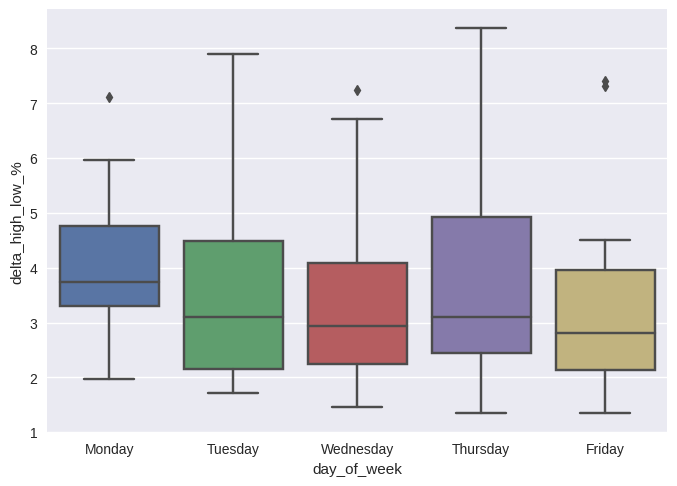

In [ ]:
#a second variable, which measures in % the amplitude in the daily stock price between the High price variable and the Low price variable :
stock_data['delta_high_low_%']=((stock_data['High']-stock_data['Low'])/stock_data['Low'])*100
stock_data['day_of_week'] = stock_data['Date'].dt.day_name()
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
sns.boxplot(stock_data.day_of_week, y=stock_data['delta_high_low_%'], order=order);
#The highest amplitude is more likely to occur during Thirsday, which could be interesting to know for a day trading.

## **EDA for Apple**

CALCULATING DAILY RETURNS- Generally returns are negative.Kurtosis tells the ‘fatness’ of the tail and it is important because it tells you how ‘extreme’ can the values get.Here the value is negative, so this indicates that the chance of ‘extreme’ values are there.

mean = 0.0016119875955940281
Std deviation = 0.01301652716800449
minimum daily reurns = -0.035385543986721
maximum daily reurns = 0.03041722745625841
kurtosis= -0.0011077219996913357


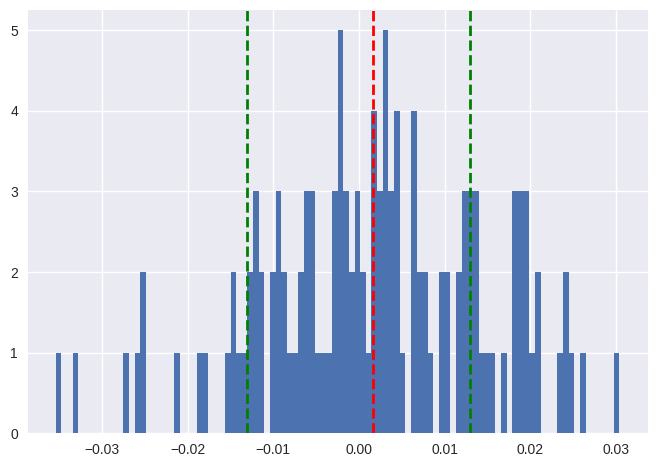

In [ ]:
#CALCULATING DAILY RETURNS
#create some useful columns for us to make some interesting inferences about the stock
#generally returns are negative
stock_data=stock_data_apple
stock_data['Daily Lag'] = stock_data['Close'].shift(1)
stock_data['Daily Returns'] = (stock_data['Daily Lag']/ stock_data['Close'])-1
mean = stock_data['Daily Returns'].mean()
std = stock_data['Daily Returns'].std()
minimum_returns=stock_data['Daily Returns'].min()
maximum_returns=stock_data['Daily Returns'].max()
print('mean =',mean)
print('Std deviation =',std)
print('minimum daily reurns =',minimum_returns)
print('maximum daily reurns =',maximum_returns)
stock_data['Daily Returns'].hist(bins=100)
plt.axvline(mean,color='red',linestyle='dashed',linewidth=2)
#to plot the std line we plot both the positive and negative values 
plt.axvline(std,color='g',linestyle='dashed',linewidth=2)
plt.axvline(-std,color='g',linestyle='dashed',linewidth=2)
#Kurtosis tells the ‘fatness’ of the tail and it is important because it tells you how ‘extreme’ can the values get.
print('kurtosis=',stock_data['Daily Returns'].kurtosis())
#the value is negative, so this indicates that the chance of ‘extreme’ values are there.


Date vs High and Low stock price plot for Apple shows flexible prices over the period.And the highest stock price was in the month of september.

(array([737881., 737911., 737942., 737972., 738003., 738034., 738064.]),
 <a list of 7 Text major ticklabel objects>)

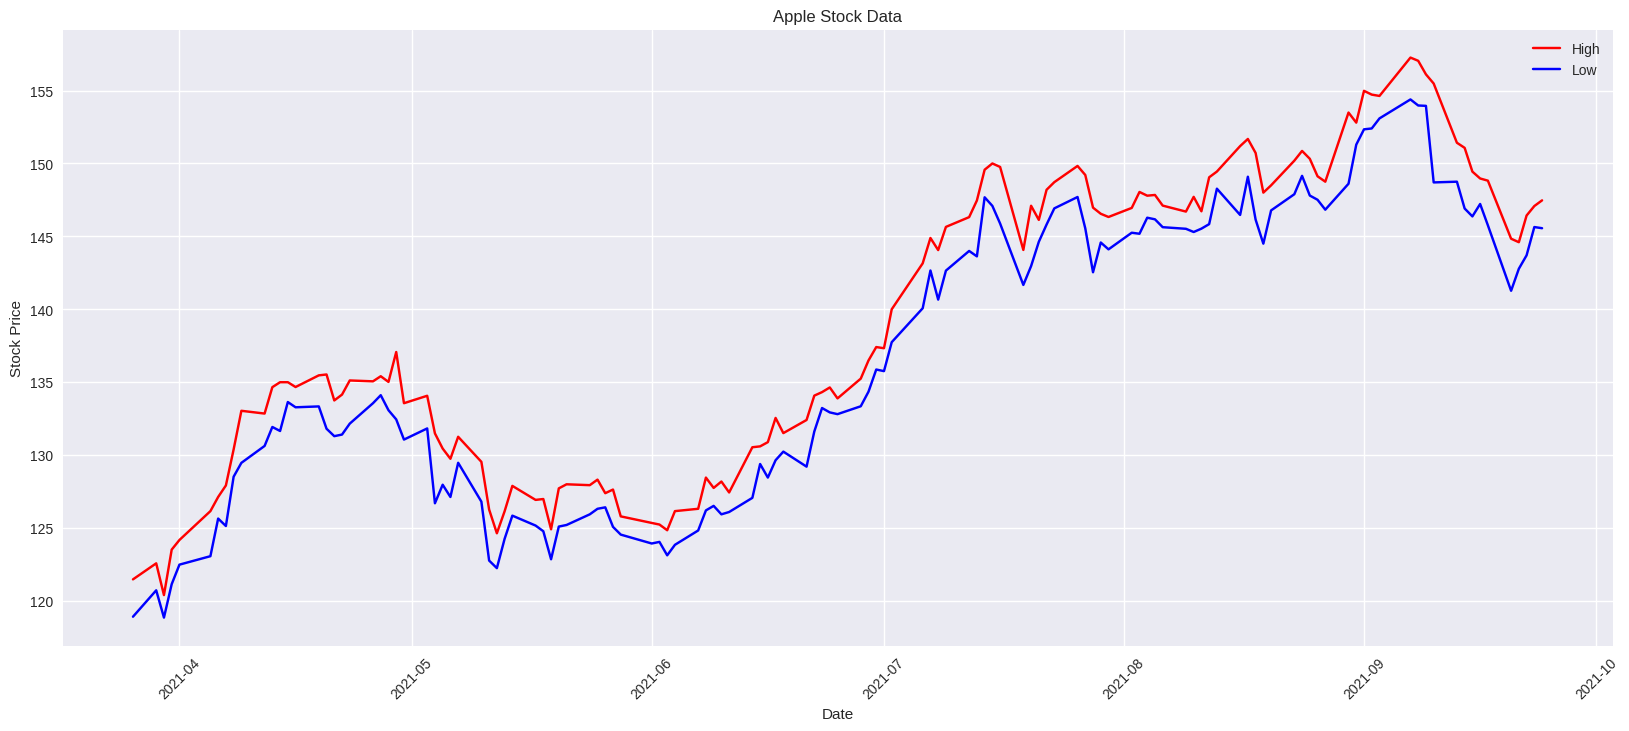

In [ ]:
# Date vs High and Low price plot for Apple
import matplotlib.pyplot as plt
#%matplotlib inline
plt.figure(figsize=(20,8))
plt.plot('Date','High',data=stock_data,color='r', label='High')
plt.plot('Date','Low',data=stock_data,color='b', label='Low')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Apple Stock Data')
plt.legend()
plt.xticks(rotation=45)

Volume is the total amount of trading activity.it can show the significance of a stock’s price movement.High volume can carry more weight because it indicates that many traders were behind the move. Here for amazon the end of april shows the highest trading activity.

(array([737881., 737911., 737942., 737972., 738003., 738034., 738064.]),
 <a list of 7 Text major ticklabel objects>)

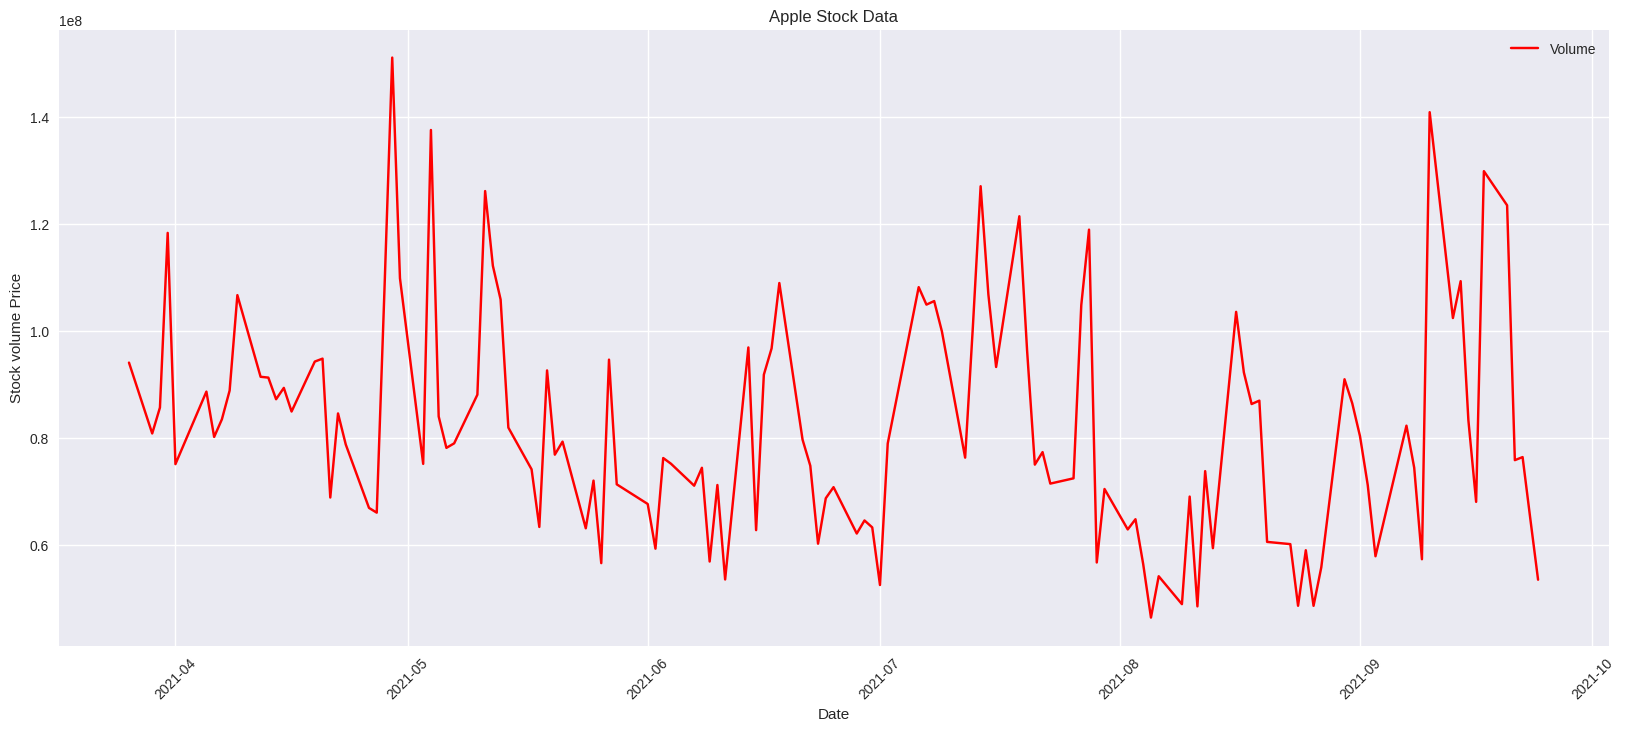

In [ ]:
# Trade volume plot for Apple
import matplotlib.pyplot as plt
#%matplotlib inline
plt.figure(figsize=(20,8))
plt.plot('Date','Volume',data=stock_data,color='r', label='Volume')
plt.xlabel('Date')
plt.ylabel('Stock volume Price')
plt.title('Apple Stock Data')
plt.legend()
plt.xticks(rotation=45)

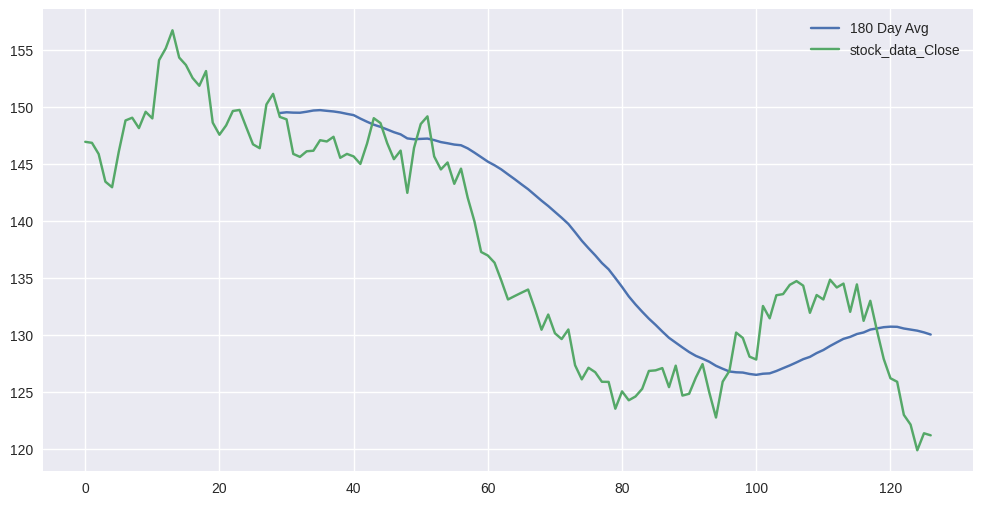

In [ ]:
#Plot the rolling 180 day average against the Close Price for stock_data
plt.figure(figsize=(12,6))
stock_data['Close'].rolling(window=30).mean().plot(label='180 Day Avg')
stock_data['Close'].plot(label='stock_data_Close')
plt.legend()

Apple shows an almost synchronous open and close value over the period.

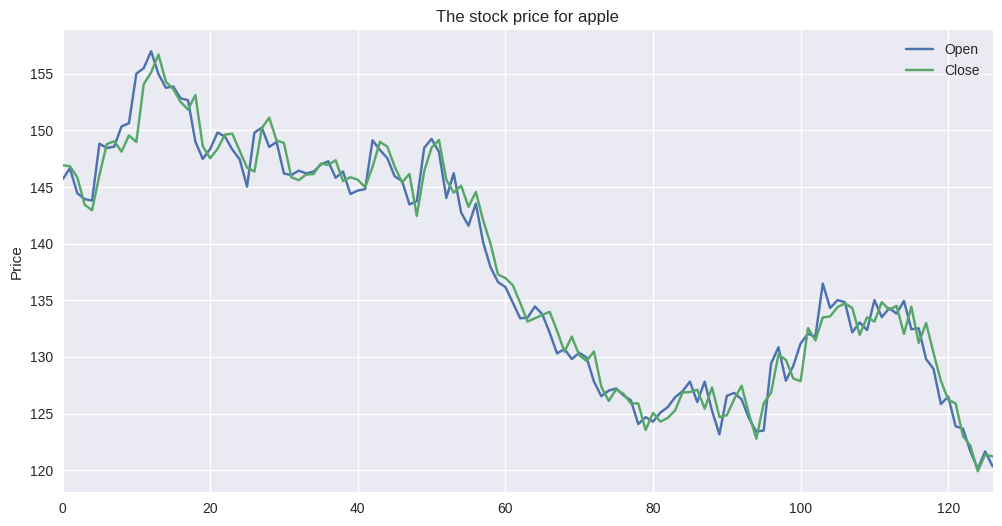

In [ ]:
#plotting the open and close value of apple
title = 'The stock price for apple'
ylabel='Price'
ax = stock_data[['Open','Close']].plot(figsize=(12,6),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(ylabel=ylabel);

Summarizing Time-series Data with Histograms. The month of september shows the highest closing average over 6 months.

In [ ]:
#pass in daily data and display it as monthly averages by setting histfunc="avg and xbins_size="M1".
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
fig = px.histogram(stock_data, x="Date", y="Close", histfunc="avg", title="Histogram on Date Axes")
fig.update_traces(xbins_size="M1")
fig.update_xaxes(showgrid=True,dtick="M1", tickformat="%b\n%Y")
fig.update_layout(bargap=0.1)
fig.add_trace(go.Scatter(mode="markers", x=stock_data["Date"], y=stock_data["Close"], name="daily"))
fig.show()

OHLC plots.An OHLC chart is a type of bar chart that shows open, high, low, and closing prices for each period.The chart type is useful because it can show increasing or decreasing momentum. When the open and close are far apart it shows strong momentum.The high and low show the full price range of the period, useful in assessing volatility.The entire structure is called a price bar. The height of the vertical line represents the intraday range for the period, with the high being the period's high and the low of the vertical line being the period's low.When the price rises over a period, the right line will be above the left, since the close is above the open. HERE THE MONTH OF JULY SHOWS MOST OF THE CLOSING PRICES ABOVE THE OPENING PRICES INDICATES A GOOD TREND.

In [ ]:
#OHLC plot with custom colurs,increasing_line_color= 'cyan', decreasing_line_color= 'gray'

import plotly.graph_objects as go
fig = go.Figure(data=[go.Ohlc(
    x=stock_data['Date'],
    open=stock_data['Open'], high=stock_data['High'],
    low=stock_data['Low'], close=stock_data['Close'])])
    
fig.show()

CANDLESTICK PLOTS Candlesticks reflect the impact of investor sentiment on security prices and are used by technical analysts to determine when to enter and exit trades.The candlestick's shadows show the day's high and low and how they compare to the open and close.Long candlesticks indicate there is strong buying pressure; this typically indicates price is bullish. Here for apple,the highest candle stick value is for the month of semptember over the 6 month period.

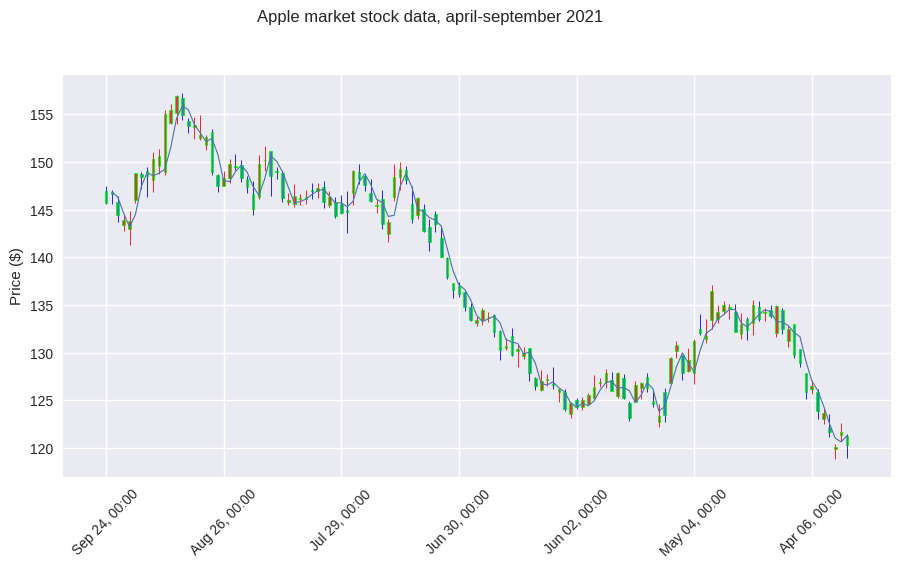

In [ ]:
#mplfinance candlestickplot to analyse stock data,see the volume plot below the candlestick chart,gaps showing for non-trading days as well
#added moving averages of price by passing value,pass information about the size and quality of an image to be saved.
!pip install --upgrade mplfinance
import mplfinance as fplt
stock_data.index = pd.DatetimeIndex(stock_data['Date'])

#taking one month data for candlestickplot
#stock_data_1month=stock_data.loc['04/06/2021':'08/30/2021',:]
mc = fplt.make_marketcolors(
                            up='tab:blue',down='tab:red',
                            edge='lime',
                            wick={'up':'blue','down':'red'},
                            volume='lawngreen',
                           )

s  = fplt.make_mpf_style(base_mpl_style="seaborn", marketcolors=mc)

fplt.plot(
        stock_data,
        type="candle",
        title='Apple market stock data, april-september 2021',
        ylabel='Price ($)',
        mav=(2),
        figratio=(12,6),
        style=s
        #savefig=dict(fname='apple_march_2020.png',dpi=100,pad_inches=0.25),
        
    )



In [ ]:

#CandleStick with Slider to Analyze Range 
candlestick = go.Candlestick(
                                x=stock_data.index,
                                open=stock_data['Open'],
                                high=stock_data['High'],
                                low=stock_data['Low'],
                                close=stock_data['Close'],
                                increasing_line_color= 'blue', decreasing_line_color= 'orange',

                            )

fig = go.Figure(data=[candlestick])

fig.update_layout(
    title="stock data,April -september 2021",
    yaxis_title='price($)',
)

fig.show()

Box plot-A Box Plot is a convenient way of graphically depicting groups of numerical data through their quartiles. They provide a graphical rendition of statistical data based on the minimum, first quartile, median, third quartile, and maximum, also Outliers can be plotted as individual points.The points outside the ends of the whiskers are outliers or suspected outliers.

BOX plot- Here box plot is used to find which weekday is better for day trading based on the price amplitude, and which is more likely to witness the highest gap at the opening of the market.The highest gap is more likely to occur on monday, while the lowest is more likely to occur on Friday. Selling stocks on monday’s opening time might be more profitable.

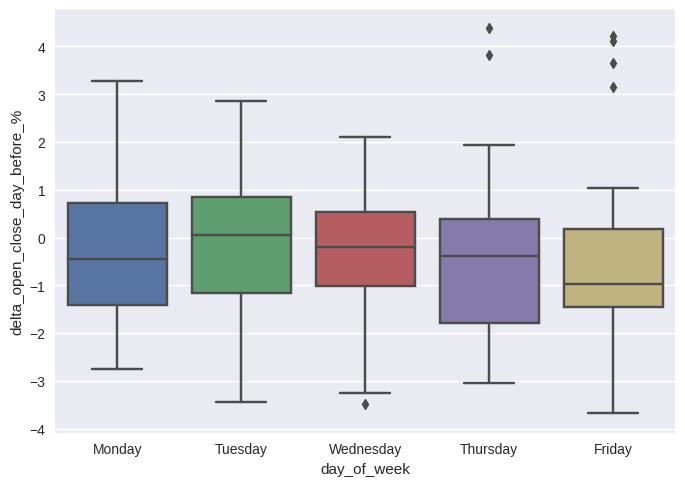

In [ ]:
#explore the dataset by adding new variables
#first variable measures the gap between the Close price and the day-after Open price :
stock_data['delta_open_close_day_before_%']=((stock_data['Open']-stock_data['Close'].shift(1))/stock_data['Close'].shift(1))*100
#plot this new variable grouped by the weekday
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data['day_of_week'] = stock_data['Date'].dt.day_name()
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
sns.boxplot(x=stock_data.day_of_week, y=stock_data['delta_open_close_day_before_%'], order=order);


A second variable, which measures in % the amplitude in the daily stock price between the High price variable and the Low price variable.It especially allows figure out which weekday is better for day trading based on the price amplitude, and which is more likely to witness the highest gap at the opening of the market. The highest amplitude is more likely to occur during Tuesday, which could be interesting to know for a day trading.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



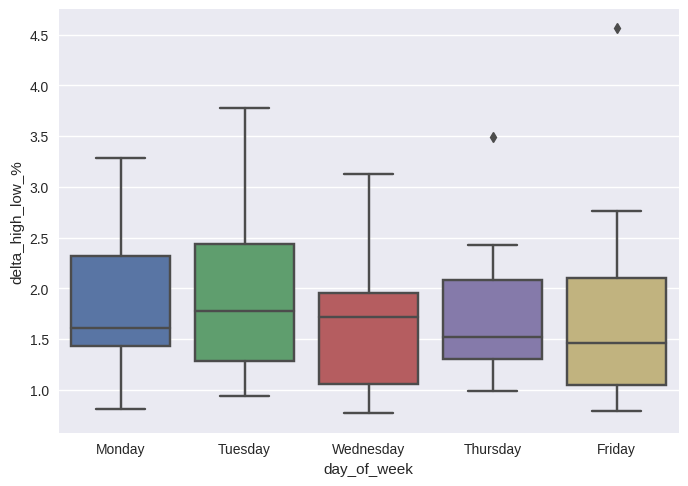

In [ ]:
#a second variable, which measures in % the amplitude in the daily stock price between the High price variable and the Low price variable :
stock_data['delta_high_low_%']=((stock_data['High']-stock_data['Low'])/stock_data['Low'])*100
stock_data['day_of_week'] = stock_data['Date'].dt.day_name()
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
sns.boxplot(stock_data.day_of_week, y=stock_data['delta_high_low_%'], order=order);
#The highest amplitude is more likely to occur during Tuesday, which could be interesting to know for a day trading.

EDA for **IBM**

CALCULATING DAILY RETURNS- Generally returns are negative.Kurtosis tells the ‘fatness’ of the tail and it is important because it tells you how ‘extreme’ can the values get.Here the value is positive, so this indicates that the chance of ‘extreme’ values are rare.

mean = 0.00016186256459937098
Std deviation = 0.011573013240996674
minimum daily reurns = -0.04644511032416232
maximum daily reurns = 0.039012738853503315
kurtosis= 2.668446643824813


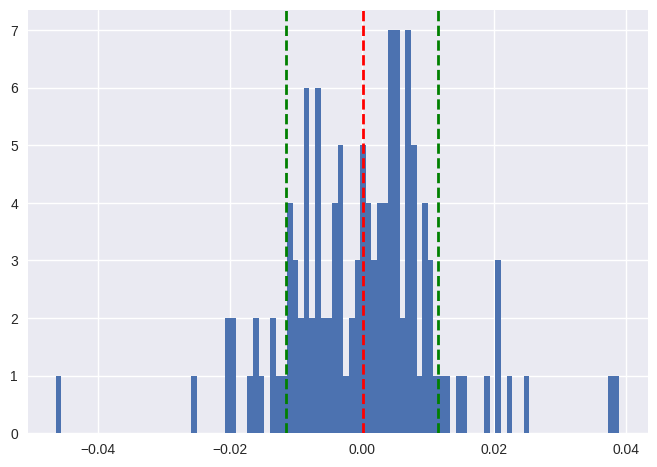

In [ ]:
#CALCULATING DAILY RETURNS
#create some useful columns for us to make some interesting inferences about the stock
#generally returns are negative
stock_data=stock_data_ibm
stock_data['Daily Lag'] = stock_data['Close'].shift(1)
stock_data['Daily Returns'] = (stock_data['Daily Lag']/ stock_data['Close'])-1
mean = stock_data['Daily Returns'].mean()
std = stock_data['Daily Returns'].std()
minimum_returns=stock_data['Daily Returns'].min()
maximum_returns=stock_data['Daily Returns'].max()
print('mean =',mean)
print('Std deviation =',std)
print('minimum daily reurns =',minimum_returns)
print('maximum daily reurns =',maximum_returns)
stock_data['Daily Returns'].hist(bins=100)
plt.axvline(mean,color='red',linestyle='dashed',linewidth=2)
#to plot the std line we plot both the positive and negative values 
plt.axvline(std,color='g',linestyle='dashed',linewidth=2)
plt.axvline(-std,color='g',linestyle='dashed',linewidth=2)
#Kurtosis tells the ‘fatness’ of the tail and it is important because it tells you how ‘extreme’ can the values get.
print('kurtosis=',stock_data['Daily Returns'].kurtosis())
#the value is positive, so this indicates that the chance of ‘extreme’ values are rare.


Date vs High and Low stock price plot for IBM shows flexible prices over the period.And the highest stock price was in the month of june.

(array([737881., 737911., 737942., 737972., 738003., 738034., 738064.]),
 <a list of 7 Text major ticklabel objects>)

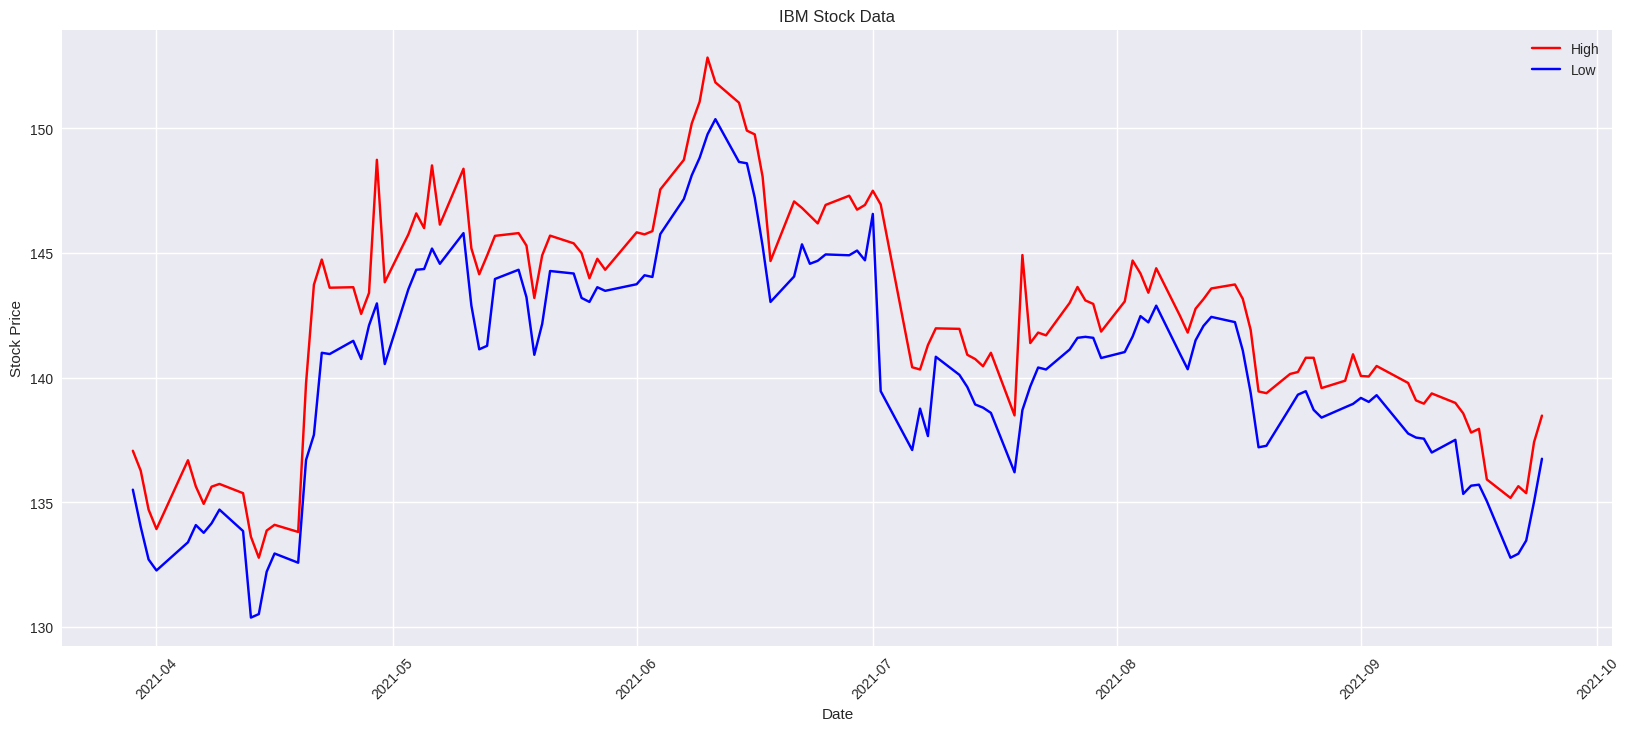

In [ ]:
# Date vs High and Low price plot for IBM
import matplotlib.pyplot as plt
#%matplotlib inline
plt.figure(figsize=(20,8))
plt.plot('Date','High',data=stock_data,color='r', label='High')
plt.plot('Date','Low',data=stock_data,color='b', label='Low')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('IBM Stock Data')
plt.legend()
plt.xticks(rotation=45)

Volume is the total amount of trading activity.it can show the significance of a stock’s price movement.High volume can carry more weight because it indicates that many traders were behind the move. Here for IBM the end of july shows the highest trading activity.

(array([737881., 737911., 737942., 737972., 738003., 738034., 738064.]),
 <a list of 7 Text major ticklabel objects>)

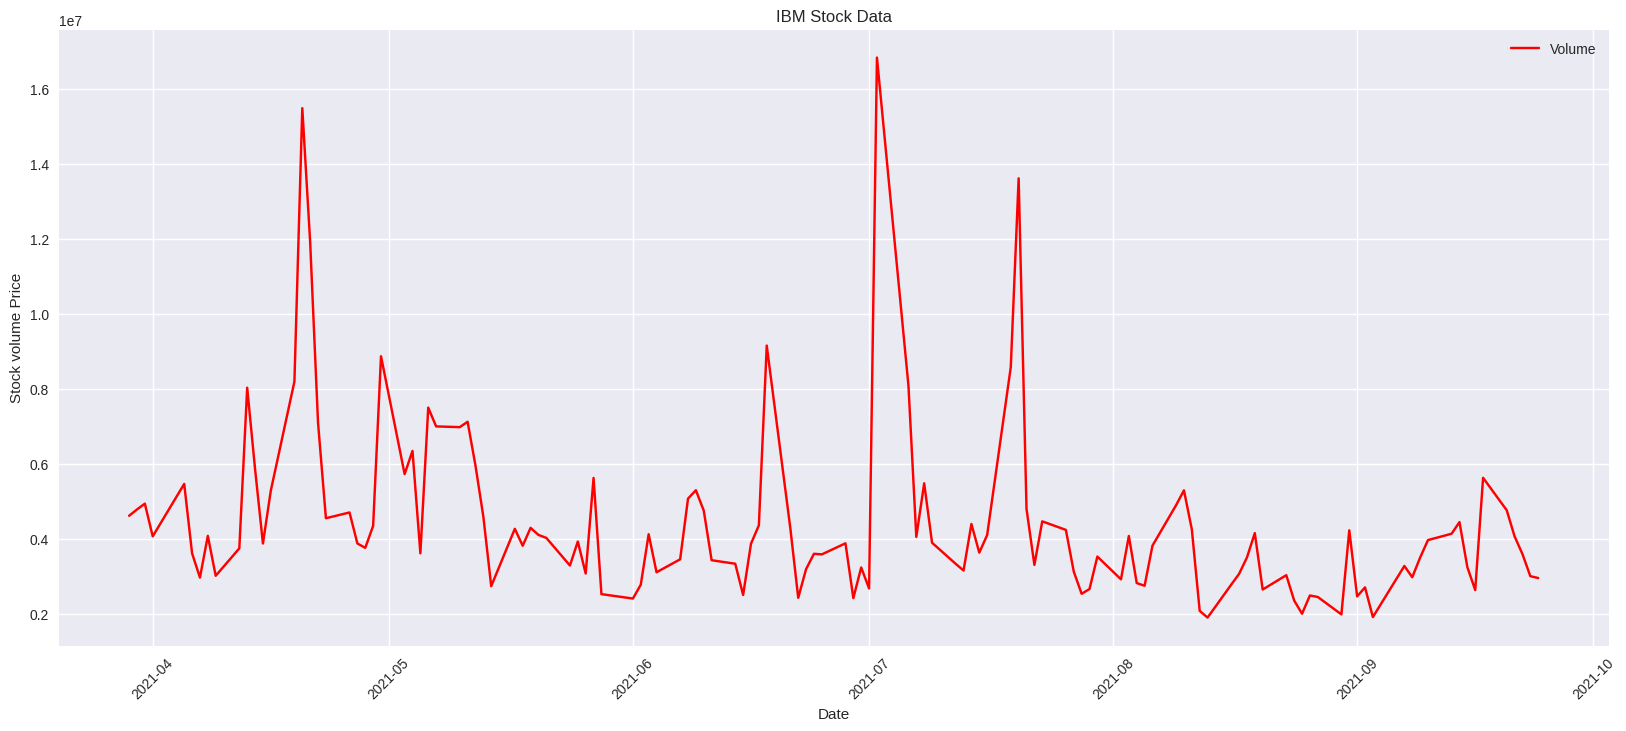

In [ ]:
# Trade volume plot for IBM
import matplotlib.pyplot as plt
#%matplotlib inline
plt.figure(figsize=(20,8))
plt.plot('Date','Volume',data=stock_data,color='r', label='Volume')
plt.xlabel('Date')
plt.ylabel('Stock volume Price')
plt.title('IBM Stock Data')
plt.legend()
plt.xticks(rotation=45)

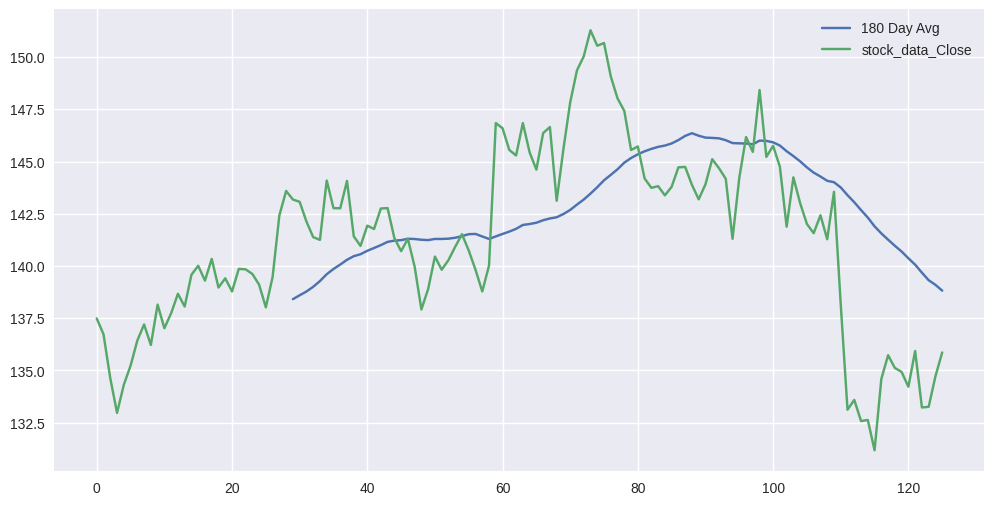

In [82]:
#Plot the rolling 180 day average against the Close Price for stock_data
plt.figure(figsize=(12,6))
stock_data['Close'].rolling(window=30).mean().plot(label='180 Day Avg')
stock_data['Close'].plot(label='stock_data_Close')
plt.legend()

IBM shows an almost synchronous open and close value over the period.

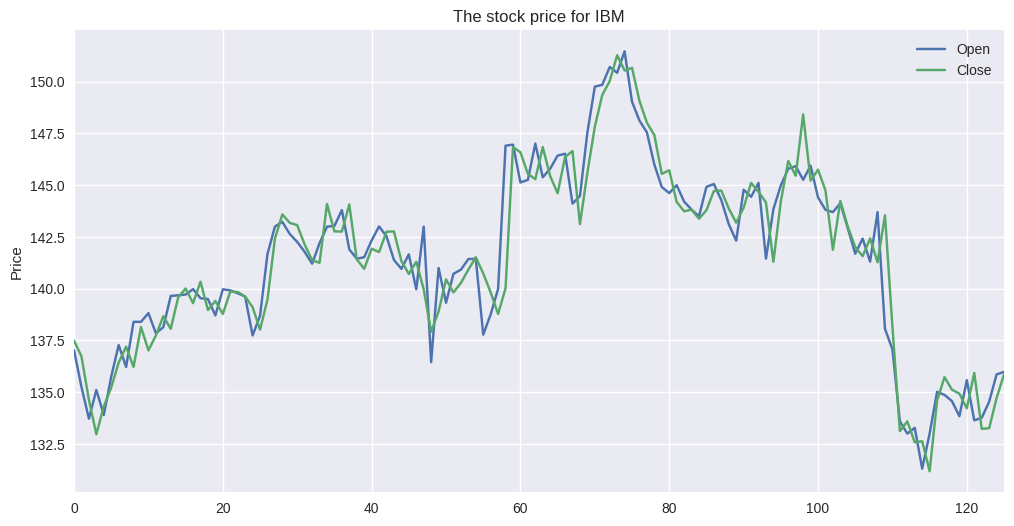

In [85]:
#plotting the open and close value of IBM
title = 'The stock price for IBM'
ylabel='Price'
ax = stock_data[['Open','Close']].plot(figsize=(12,6),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(ylabel=ylabel);

Summarizing Time-series Data with Histograms. The month of june shows the highest closing average over 6 months.

In [86]:
#pass in daily data and display it as monthly averages by setting histfunc="avg and xbins_size="M1".
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
fig = px.histogram(stock_data, x="Date", y="Close", histfunc="avg", title="Histogram on Date Axes")
fig.update_traces(xbins_size="M1")
fig.update_xaxes(showgrid=True,dtick="M1", tickformat="%b\n%Y")
fig.update_layout(bargap=0.1)
fig.add_trace(go.Scatter(mode="markers", x=stock_data["Date"], y=stock_data["Close"], name="daily"))
fig.show()

OHLC plots.An OHLC chart is a type of bar chart that shows open, high, low, and closing prices for each period.The chart type is useful because it can show increasing or decreasing momentum. When the open and close are far apart it shows strong momentum.The high and low show the full price range of the period, useful in assessing volatility.The entire structure is called a price bar. The height of the vertical line represents the intraday range for the period, with the high being the period's high and the low of the vertical line being the period's low.When the price rises over a period, the right line will be above the left, since the close is above the open. HERE THE MONTH OF MAY SHOWS MOST OF THE CLOSING PRICES ABOVE THE OPENING PRICES INDICATES A GOOD TREND.

In [87]:
#OHLC plot with custom colurs,increasing_line_color= 'cyan', decreasing_line_color= 'gray'

import plotly.graph_objects as go
fig = go.Figure(data=[go.Ohlc(
    x=stock_data['Date'],
    open=stock_data['Open'], high=stock_data['High'],
    low=stock_data['Low'], close=stock_data['Close'])])
    
fig.show()

CANDLESTICK PLOTS Candlesticks reflect the impact of investor sentiment on security prices and are used by technical analysts to determine when to enter and exit trades.The candlestick's shadows show the day's high and low and how they compare to the open and close.Long candlesticks indicate there is strong buying pressure; this typically indicates price is bullish. Here for IBM,the highest candle stick value is for the month of june over the 6 month period.

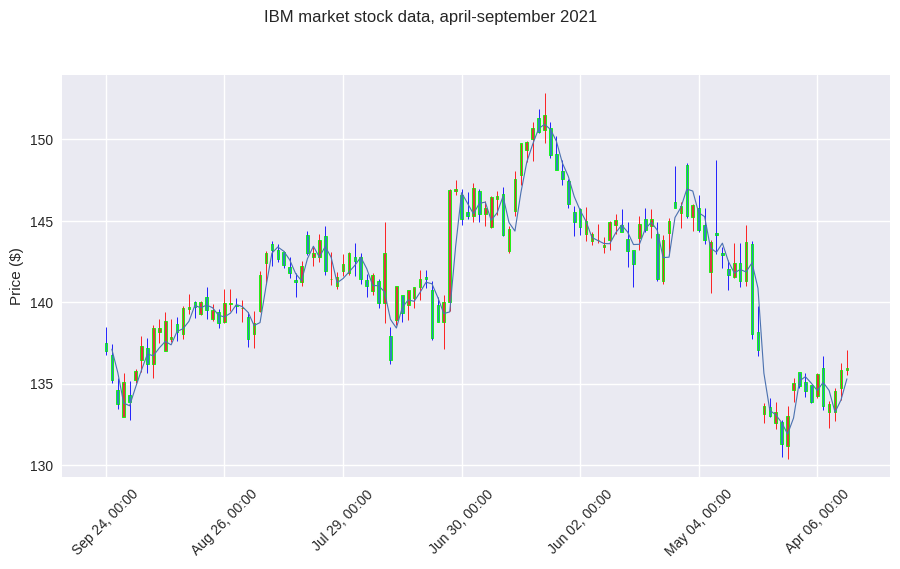

In [89]:
#mplfinance candlestickplot to analyse stock data,see the volume plot below the candlestick chart,gaps showing for non-trading days as well
#added moving averages of price by passing value,pass information about the size and quality of an image to be saved.
!pip install --upgrade mplfinance
import mplfinance as fplt
stock_data.index = pd.DatetimeIndex(stock_data['Date'])

#taking one month data for candlestickplot
#stock_data_1month=stock_data.loc['04/06/2021':'08/30/2021',:]
mc = fplt.make_marketcolors(
                            up='tab:blue',down='tab:red',
                            edge='lime',
                            wick={'up':'blue','down':'red'},
                            volume='lawngreen',
                           )

s  = fplt.make_mpf_style(base_mpl_style="seaborn", marketcolors=mc)

fplt.plot(
        stock_data,
        type="candle",
        title='IBM market stock data, april-september 2021',
        ylabel='Price ($)',
        mav=(2),
        figratio=(12,6),
        style=s
        #savefig=dict(fname='apple_march_2020.png',dpi=100,pad_inches=0.25),
        
    )



In [90]:

#CandleStick with Slider to Analyze Range 
candlestick = go.Candlestick(
                                x=stock_data.index,
                                open=stock_data['Open'],
                                high=stock_data['High'],
                                low=stock_data['Low'],
                                close=stock_data['Close'],
                                increasing_line_color= 'blue', decreasing_line_color= 'orange',

                            )

fig = go.Figure(data=[candlestick])

fig.update_layout(
    title="stock data,April -september 2021",
    yaxis_title='price($)',
)

fig.show()

Box plot-A Box Plot is a convenient way of graphically depicting groups of numerical data through their quartiles. They provide a graphical rendition of statistical data based on the minimum, first quartile, median, third quartile, and maximum, also Outliers can be plotted as individual points.The points outside the ends of the whiskers are outliers or suspected outliers.

BOX plot- Here box plot is used to find which weekday is better for day trading based on the price amplitude, and which is more likely to witness the highest gap at the opening of the market.The highest gap is more likely to occur on Monday, while the lowest is more likely to occur on Monday. Selling stocks on Monday’s opening time might be more profitable.

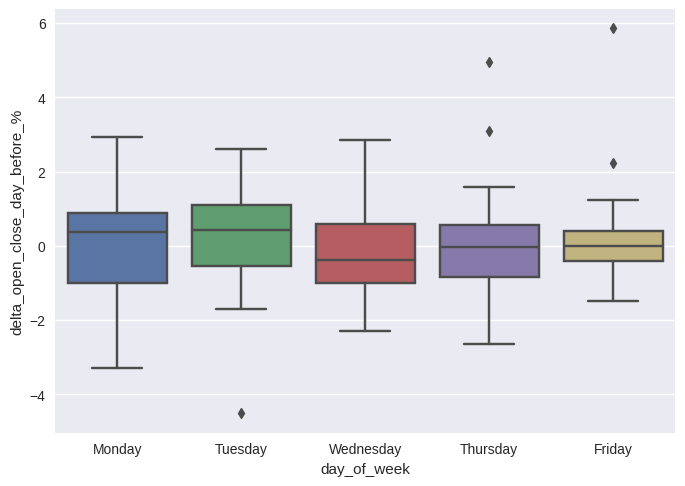

In [92]:
#explore the dataset by adding new variables
#first variable measures the gap between the Close price and the day-after Open price :
stock_data['delta_open_close_day_before_%']=((stock_data['Open']-stock_data['Close'].shift(1))/stock_data['Close'].shift(1))*100
#plot this new variable grouped by the weekday
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data['day_of_week'] = stock_data['Date'].dt.day_name()
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
sns.boxplot(x=stock_data.day_of_week, y=stock_data['delta_open_close_day_before_%'], order=order);


A second variable, which measures in % the amplitude in the daily stock price between the High price variable and the Low price variable.It especially allows figure out which weekday is better for day trading based on the price amplitude, and which is more likely to witness the highest gap at the opening of the market. The highest amplitude is more likely to occur during Thirsday, which could be interesting to know for a day trading.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



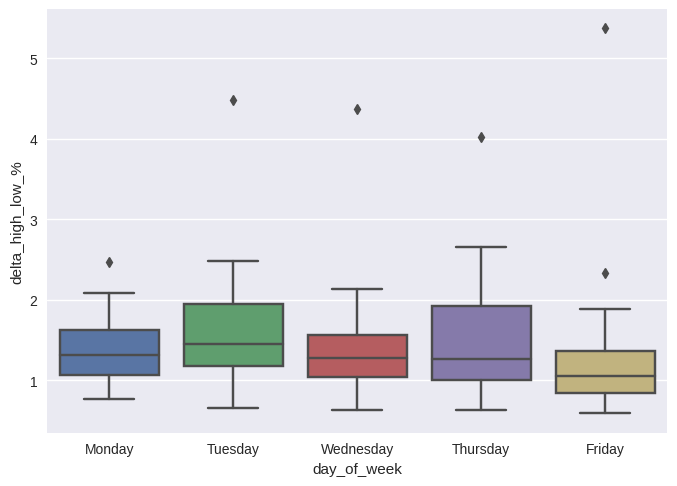

In [94]:
#a second variable, which measures in % the amplitude in the daily stock price between the High price variable and the Low price variable :
stock_data['delta_high_low_%']=((stock_data['High']-stock_data['Low'])/stock_data['Low'])*100
stock_data['day_of_week'] = stock_data['Date'].dt.day_name()
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
sns.boxplot(stock_data.day_of_week, y=stock_data['delta_high_low_%'], order=order);
#The highest amplitude is more likely to occur during Thirsday, which could be interesting to know for a day trading.